### Importing Libraries

In [1]:
import csv
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as gp
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

### Input Diabetes Dataset

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Visualize the dataset

<Figure size 1800x800 with 0 Axes>

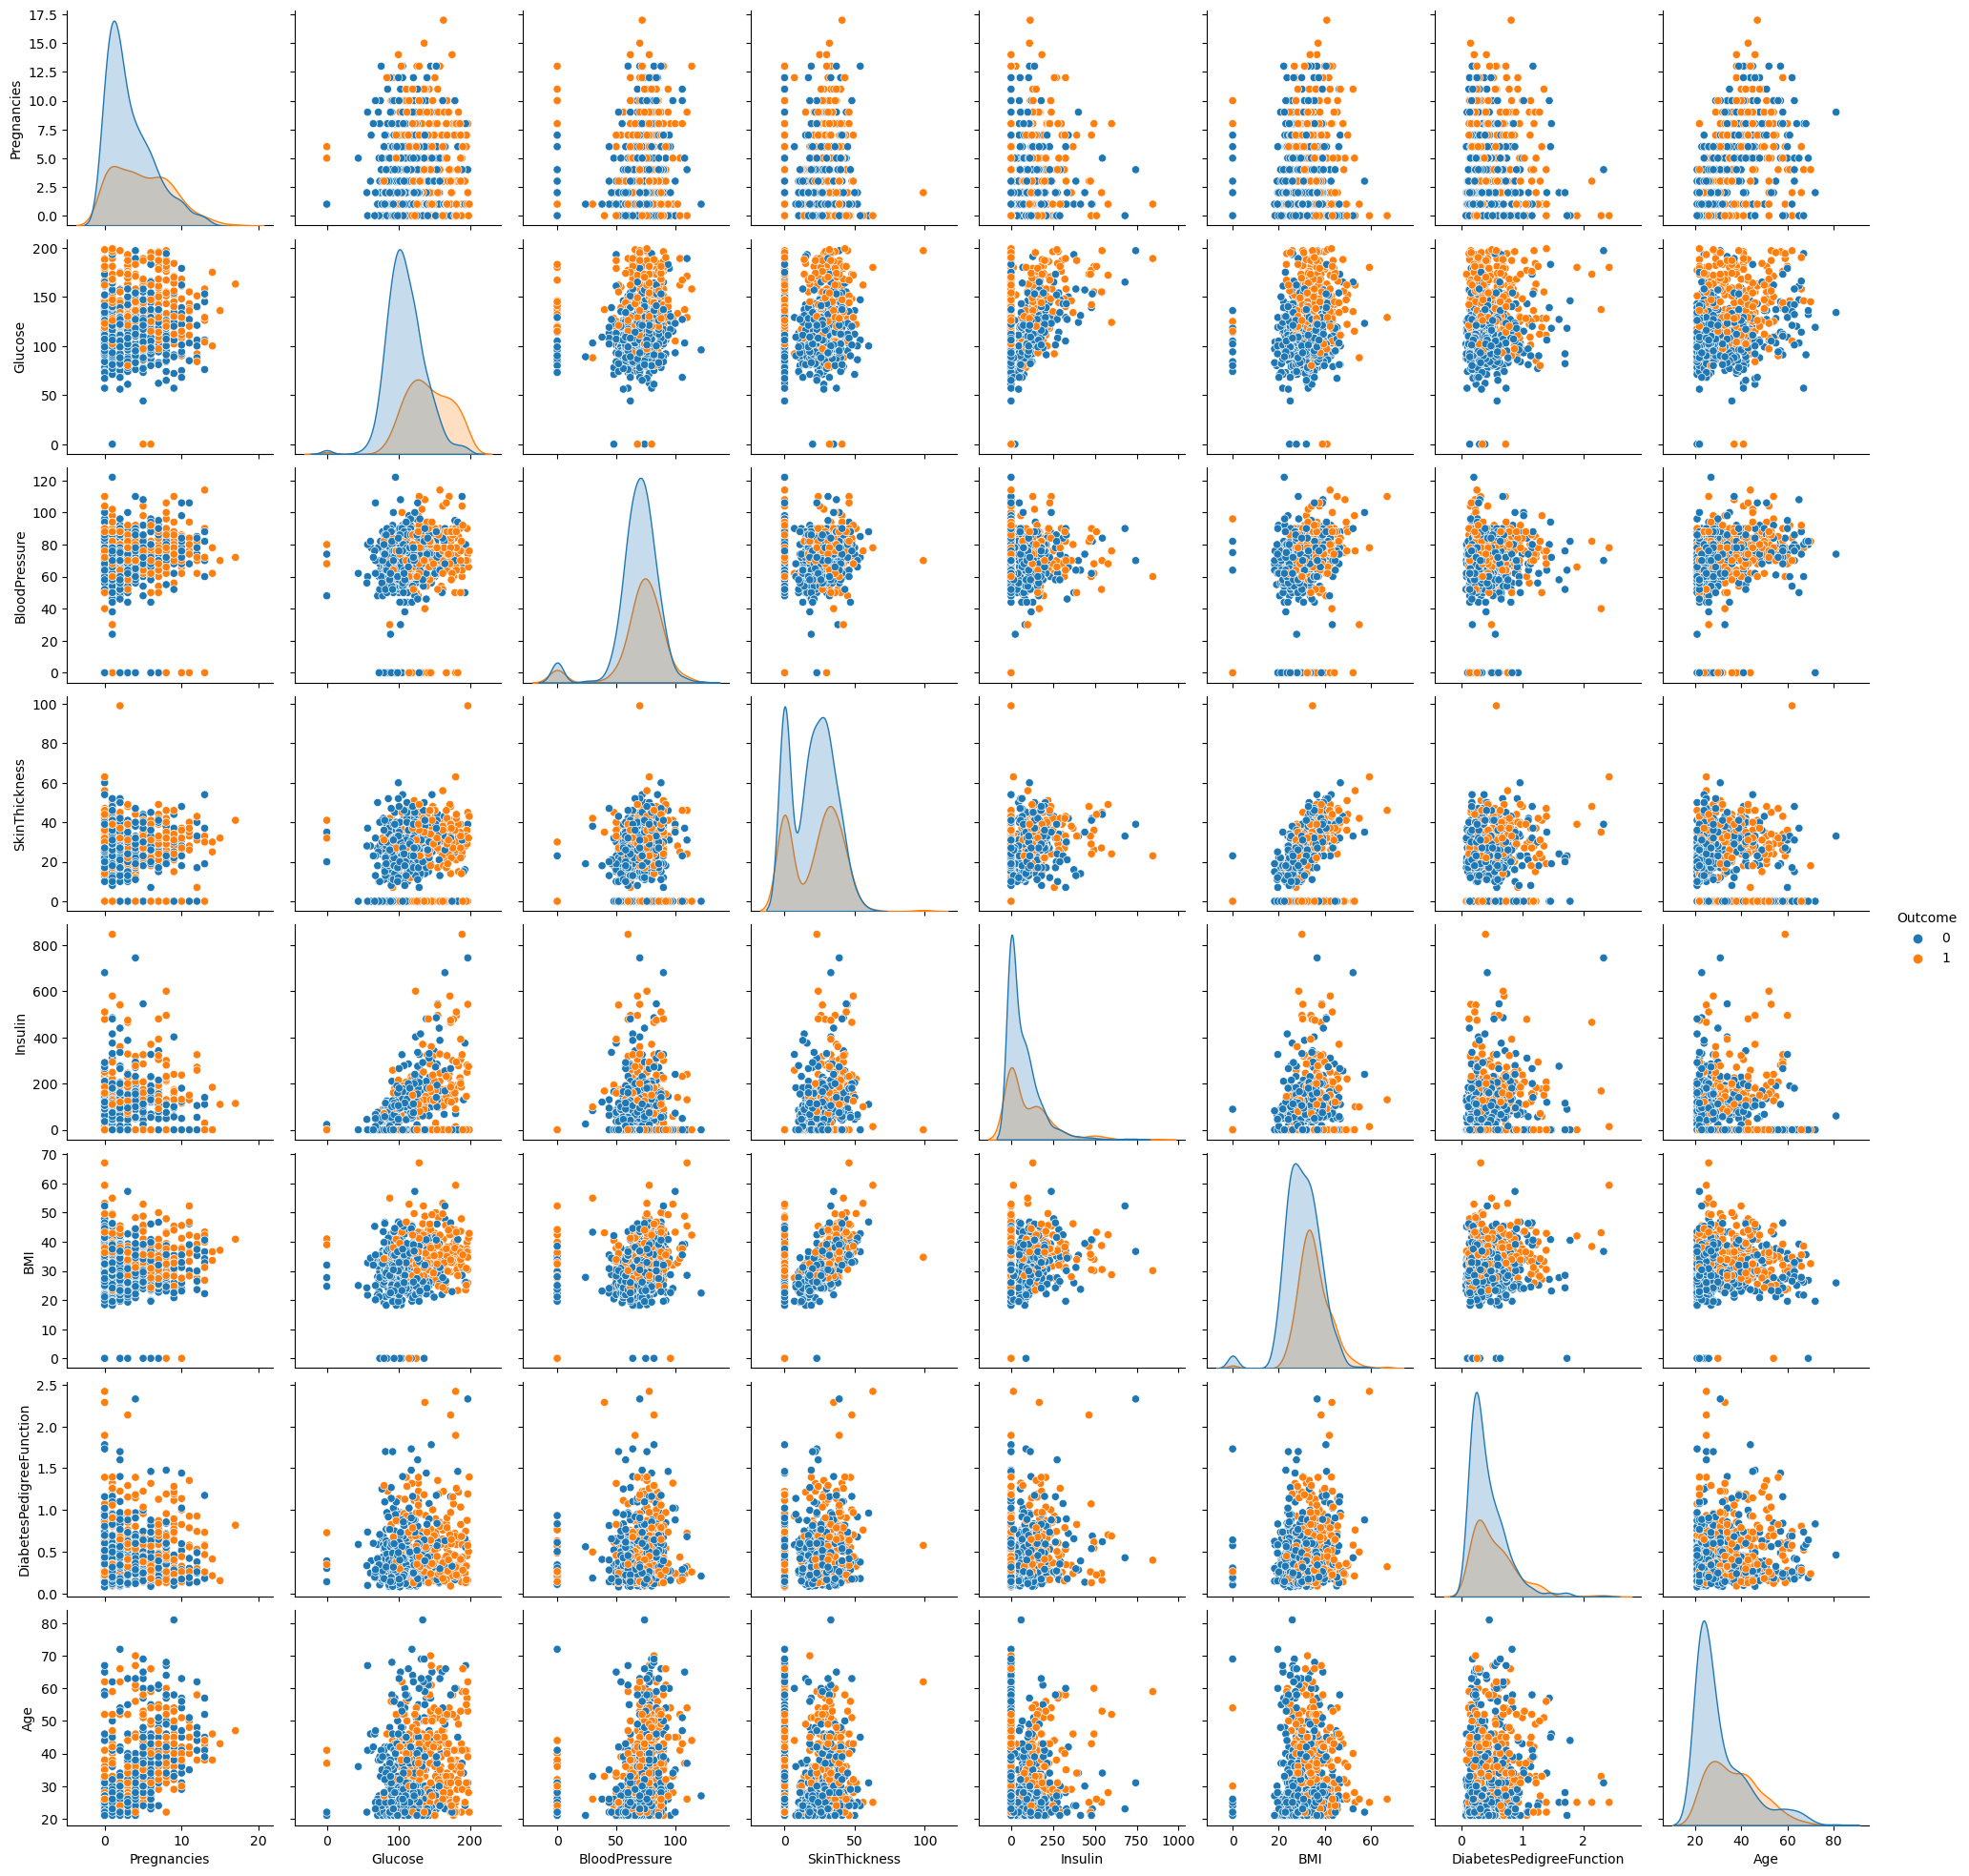

In [3]:
# Set the figure size
plt.figure(figsize=(18, 8))

sns.pairplot(df, hue="Outcome", diag_kind='kde')
plt.savefig('fig_1_dataset_output.png')
plt.show()

### Locate Missing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check for Duplicates

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [8]:
# Get the shape of the dataframe
df.shape

(768, 9)

In [9]:
# Check for NaN values in Name
df.query(''' `Pregnancies`.isna() ''')

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

### Detect Outliers

In [10]:
# Describing the statistics of the dataset column by column
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [11]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

count        mean         std     min     10%  \
Pregnancies               768.0    3.845052    3.369578   0.000   0.000   
Glucose                   768.0  120.894531   31.972618   0.000  85.000   
BloodPressure             768.0   69.105469   19.355807   0.000  54.000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.000   
Insulin                   768.0   79.799479  115.244002   0.000   0.000   
BMI                       768.0   31.992578    7.884160   0.000  23.600   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.165   
Age                       768.0   33.240885   11.760232  21.000  22.000   
Outcome                   768.0    0.348958    0.476951   0.000   0.000   

                               25%       50%        75%       90%        95%  \
Pregnancies                1.00000    3.0000    6.00000    9.0000   10.00000   
Glucose                   99.00000  117.0000  140.25000  167.0000  181.00000   
BloodPressure             62.00000   72.0000   80.00000   88.0000   90.00000   
SkinThickness              0.00000   23.0000   32.00000   40.0000   44.00000   
Insulin                    0.00000   30.5000  127.25000  210.0000  293.00000   
BMI                       27.30000   32.0000   36.60000   41.5000   44.39500   
DiabetesPedigreeFunction   0.24375    0.3725    0.62625    0.8786    1.13285   
Age                       24.00000   29.0000   41.00000   51.0000   58.00000   
Outcome                    0.00000    0.0000    1.00000    1.0000    1.00000   

                                99%     max  
Pregnancies                13.00000   17.00  
Glucose                   196.00000  199.00  
BloodPressure             106.00000  122.00  
SkinThickness              51.33000   99.00  
Insulin                   519.90000  846.00  
BMI                        50.75900   67.10  
DiabetesPedigreeFunction    1.69833    2.42  
Age                        67.00000   81.00  
Outcome                     1.00000    1.00

### Taking a look at the Outcome column

In [12]:
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [13]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Checking the Age column visually for irregularity

<Axes: >

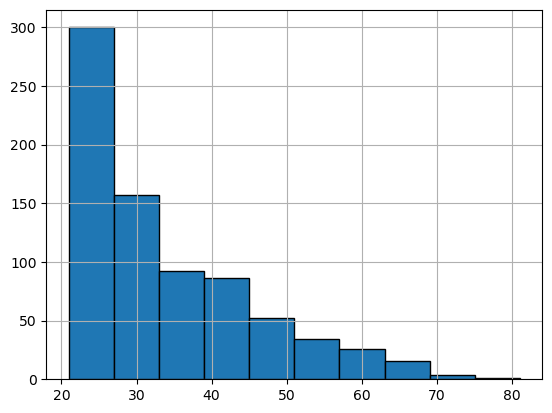

In [14]:
df["Age"].hist(edgecolor = "black")

### Using a histogram plot for all columns against the Outcome column

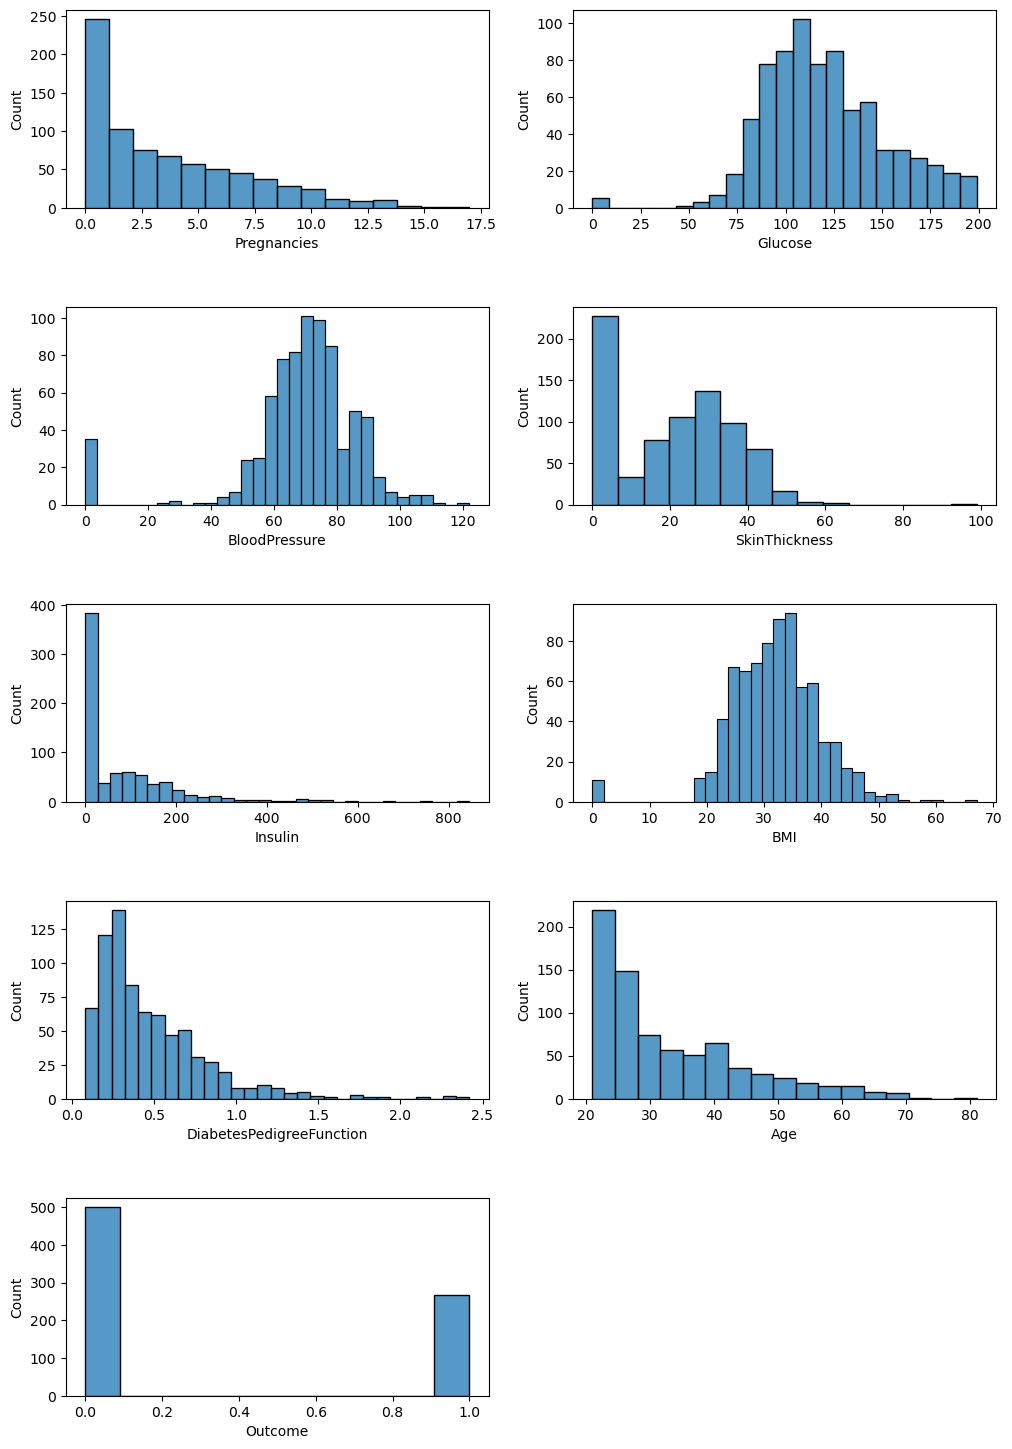

In [15]:
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.columns:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=col_name, 
                )
    i += 1

### Values that should not be zero includes Glucose, BloodPressure, SkinThickness, Insulin and BMI

In [16]:
# replacing all such values that should not be zero with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [17]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Looking for outliers

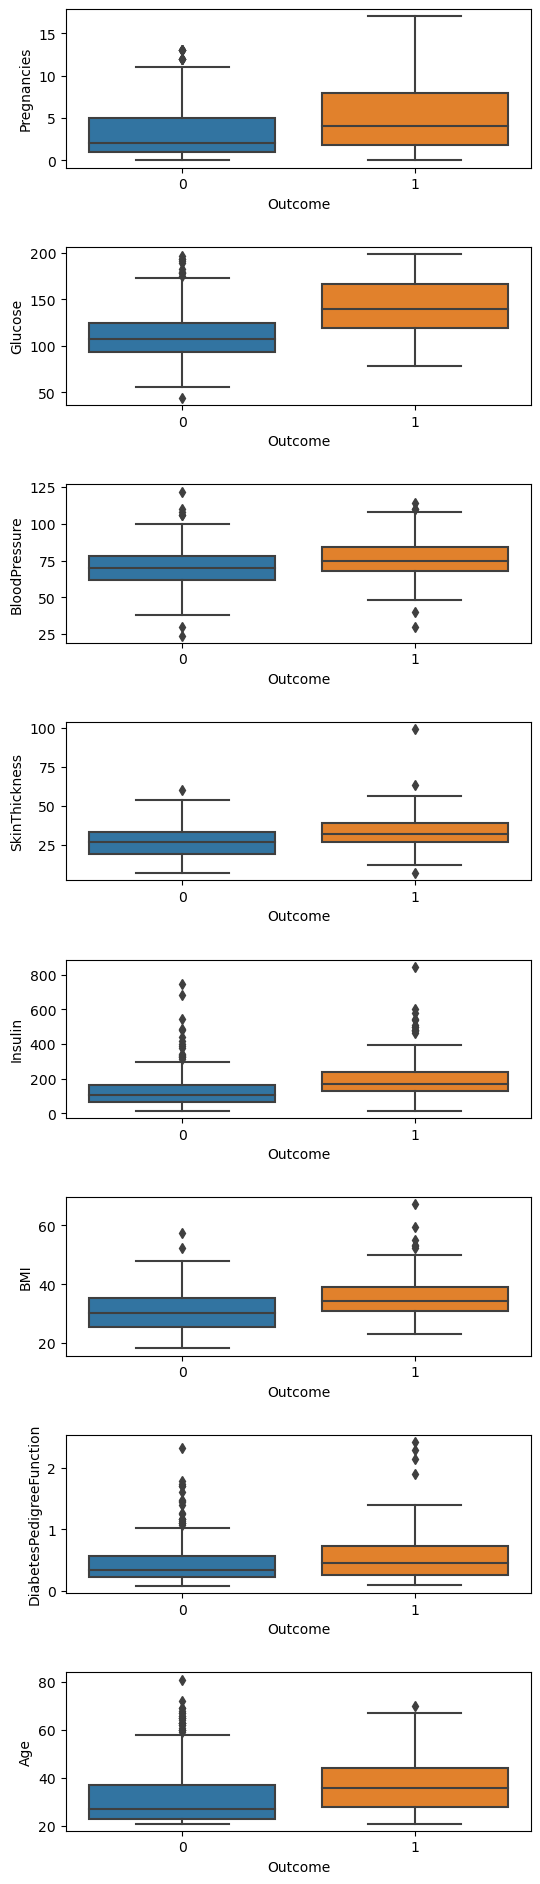

In [18]:
plt.figure(figsize=(6,36))
plt.subplots_adjust(hspace=0.5)

i = 1
for col_name in df.columns.drop('Outcome'):
    plt.subplot(12,1,i)
    sns.boxplot(data=df, x='Outcome', y=col_name)
    i +=1
    


### Showing the Number of Outliers

In [19]:
iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 1.5*iqr
upper = df.quantile(0.75) + 1.5*iqr

print("Number of outliers")
((df < lower) + (df > upper)).sum()

Number of outliers


Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness                3
Insulin                     24
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

### Showing the Number of extreme Outliers

In [20]:
iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 3*iqr
upper = df.quantile(0.75) + 3*iqr

print("Number of extreme outliers")
((df < lower) + (df > upper)).sum()

Number of extreme outliers


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     8
BMI                         1
DiabetesPedigreeFunction    6
Age                         0
Outcome                     0
dtype: int64

In [21]:
df[(df['Outcome'] == 0)].quantile(0.5)

Pregnancies                   2.000
Glucose                     107.000
BloodPressure                70.000
SkinThickness                27.000
Insulin                     102.500
BMI                          30.100
DiabetesPedigreeFunction      0.336
Age                          27.000
Outcome                       0.000
Name: 0.5, dtype: float64

In [22]:
df[(df['Outcome'] == 1)].quantile(0.5)

Pregnancies                   4.000
Glucose                     140.000
BloodPressure                74.500
SkinThickness                32.000
Insulin                     169.500
BMI                          34.300
DiabetesPedigreeFunction      0.449
Age                          36.000
Outcome                       1.000
Name: 0.5, dtype: float64

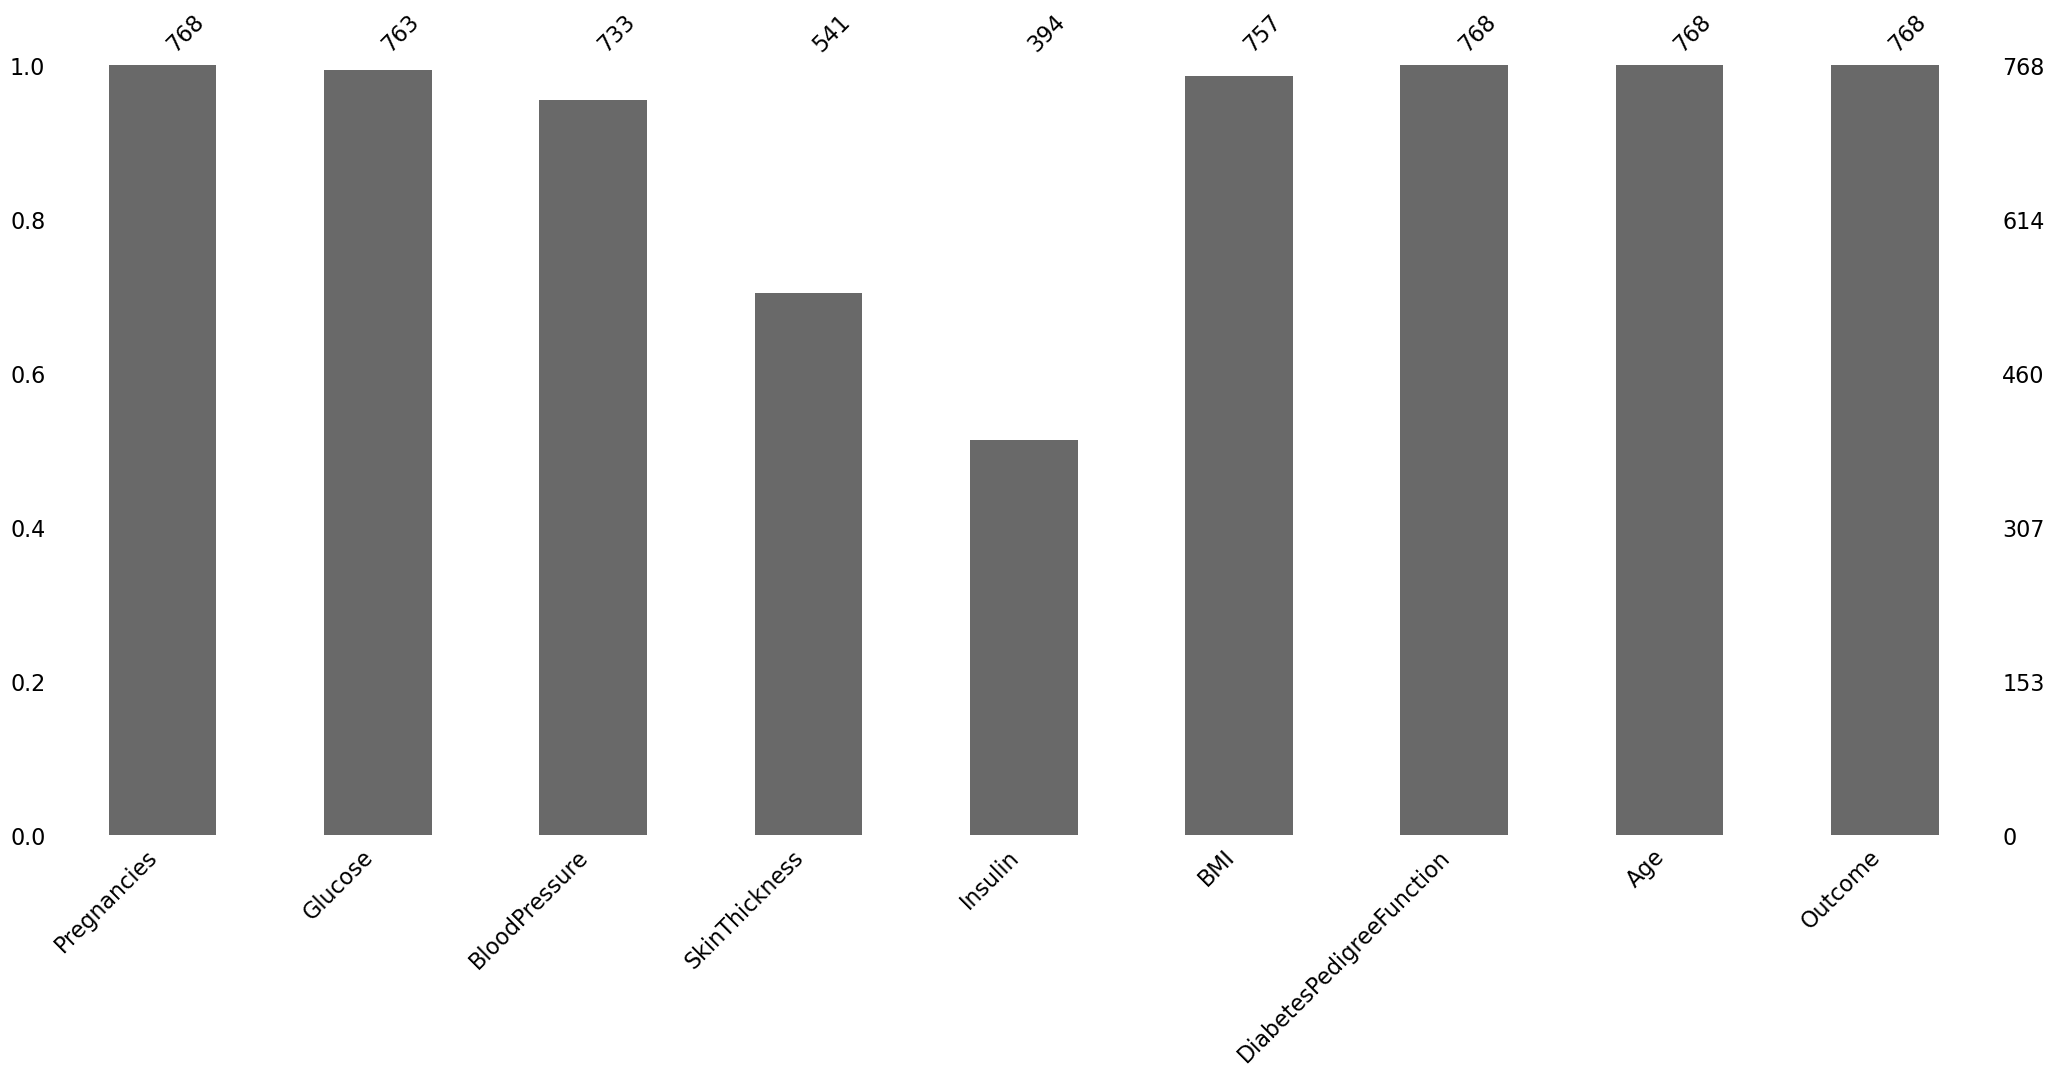

In [23]:
import missingno as msno
msno.bar(df);

### Imputation of median for Nan Values

In [24]:
median_fulldata = df.groupby('Outcome').agg('median')
dp = df.copy()

# Leak imputation
for col in df.columns.drop('Outcome'):
    df.loc[((df[col].isnull()) & (df['Outcome'] == 0)),col] = median_fulldata[col][0]
    df.loc[((df[col].isnull()) & (df['Outcome'] == 1)),col] = median_fulldata[col][1]

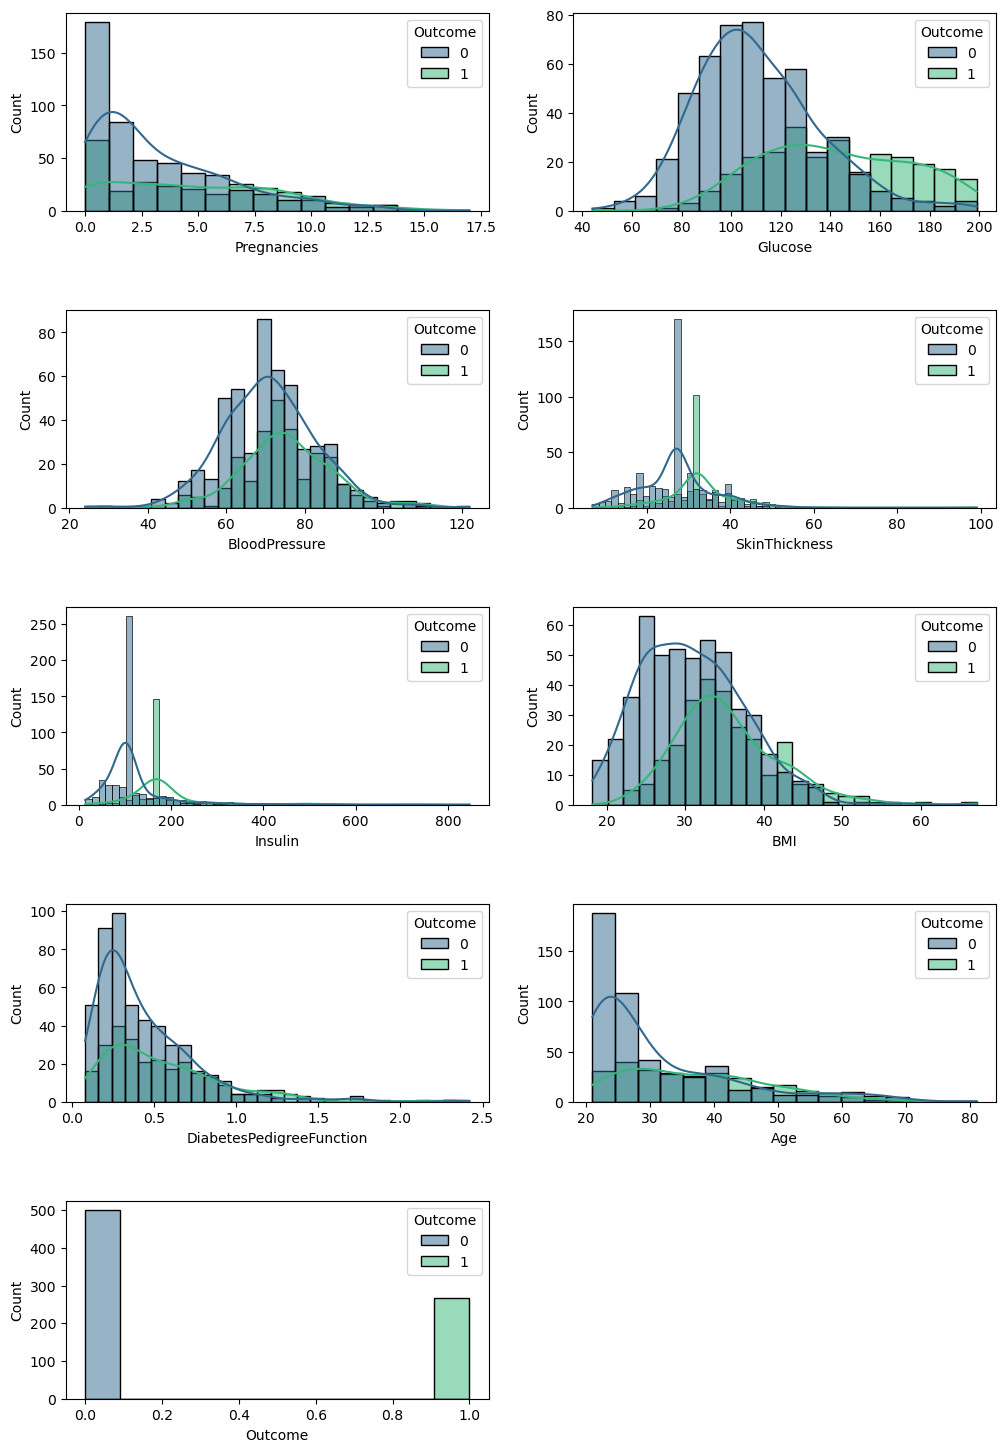

In [25]:
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.columns:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=col_name, kde=True, hue='Outcome', multiple='layer', alpha=0.5, palette='viridis')
    i += 1

In [26]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
df["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Using Principal Component Analysis

In [28]:
# Standardize Data
scaler = StandardScaler()                # Create Scaler
df_dropped_outcome = df.drop('Outcome', axis=1)
data_scaled = scaler.fit_transform(df_dropped_outcome)   # Fit scaler
print(data_scaled)                       # Print scaler

[[ 0.63994726  0.86462486 -0.03218035 ...  0.16948251  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20472661 -0.52812374 ... -0.84854874 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01426457 -0.69343821 ... -1.32847775  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02224005 -0.03218035 ... -0.90672195 -0.68519336
  -0.27575966]
 [-0.84488505  0.14199419 -1.02406713 ... -0.33953311 -0.37110101
   1.17073215]
 [-0.84488505 -0.94195182 -0.19749482 ... -0.2959032  -0.47378505
  -0.87137393]]


In [29]:
# Print Standardized Data in DataFrame Format since the data_scaled is returned as a numpy array
DF_scaled = pd.DataFrame(data = data_scaled,                           # Create DataFrame DF_scaled
                         columns = df_dropped_outcome.keys().values)
DF_scaled.head(6)                                                      # Print first 6 rows of DF_scaled


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.864625      -0.032180       0.665181  0.311604  0.169483   
1    -0.844885 -1.204727      -0.528124      -0.010112 -0.440843 -0.848549   
2     1.233880  2.014265      -0.693438       0.327535  0.311604 -1.328478   
3    -0.844885 -1.073339      -0.528124      -0.685405 -0.536303 -0.630399   
4    -1.141852  0.503310      -2.677212       0.665181  0.294758  1.551096   
5     0.342981 -0.186474       0.133134      -0.235210 -0.440843 -0.993982   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  
5                 -0.818079 -0.275760

### To Decide the Ideal Component Number

In [30]:
# Ideal Number of Components
pca = PCA(n_components = 8)                 # Create PCA object forming 10 PCs
pca_trans = pca.fit_transform(DF_scaled)     # Transform data
print(pca_trans)                             # Print transformed data
print(pca_trans.shape)                       # Print dimensions of transformed data

[[ 1.57576908 -0.6134653   0.44270608 ...  0.63477163  0.25779968
   0.22782668]
 [-1.57592986  0.07963747 -0.34085658 ...  0.12151896  0.92720983
  -0.10060341]
 [ 0.73454808 -0.543459    1.82650329 ...  1.05966566 -0.95059028
  -1.33517779]
 ...
 [-0.89459686 -0.83706579  0.23005321 ...  0.01194641 -0.32043296
  -0.3696936 ]
 [-0.07097671 -0.0043742   0.56112434 ...  0.89118108  1.13429684
   0.75359748]
 [-1.29258576  0.64661753 -0.72971575 ... -0.03435531  0.40072705
  -0.30542323]]
(768, 8)


In [31]:
prop_var = pca.explained_variance_ratio_     # Extract proportion of explained variance
print(prop_var)                              # Print proportion of explained variance

[0.29817668 0.18752573 0.14036503 0.11384376 0.09551291 0.06311189
 0.05444859 0.04701541]


In [32]:
PC_number = np.arange(pca.n_components_) + 1 # Enumarate component numbers
print(PC_number)                             # Print component numbers

[1 2 3 4 5 6 7 8]


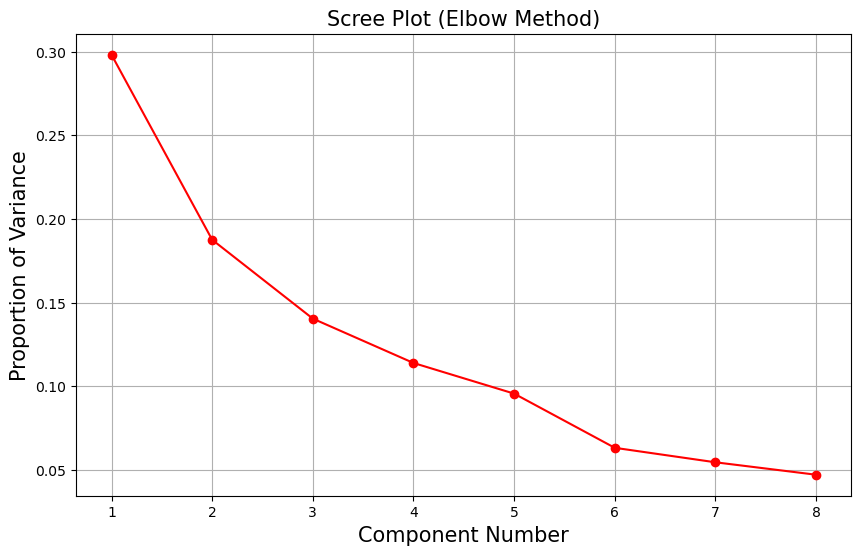

In [33]:
# Scree Plot
plt.figure(figsize=(10, 6))                 # Set figure and size
plt.plot(PC_number,                         # Plot prop var
         prop_var,
         'ro-')                             # red solid line with circle markers
plt.title('Scree Plot (Elbow Method)',      # Plot Annotations
          fontsize = 15)
plt.xlabel('Component Number',
           fontsize = 15)
plt.ylabel('Proportion of Variance',
           fontsize = 15)
plt.grid()                                  # Add grid lines
plt.show()                                  # Print graph

#### Normally using the elbow method, the user is meant to select the components just before the line flattens out

#### Kaiser method can be used which suggests keeping components explaining data variation greater than 1

In [34]:
# Alternative Scree Plot Data
var = pca.explained_variance_                # Extract explained variance
print(var)                                   # Print explained variance

[2.38852349 1.50216175 1.12438429 0.91193748 0.76509953 0.50555339
 0.43615665 0.37661365]


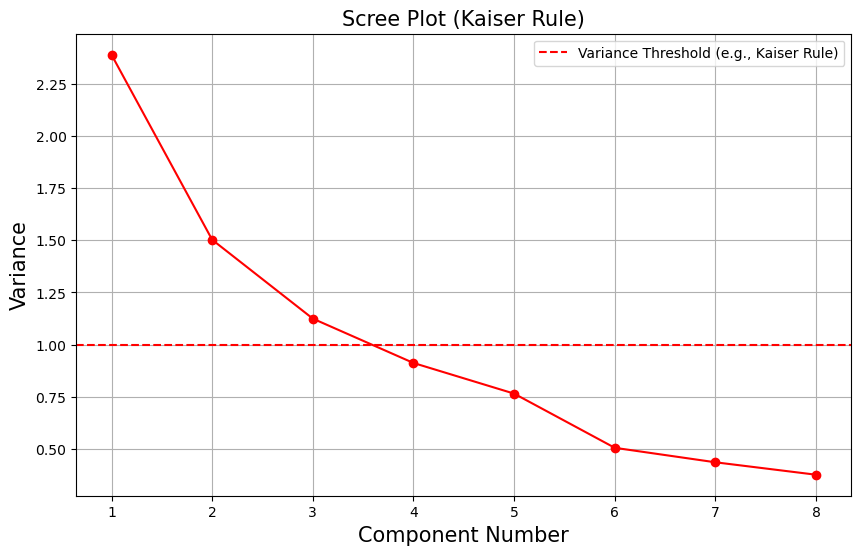

In [35]:
# Alternative Scree Plot
plt.figure(figsize=(10, 6))                 # Set figure and size
plt.plot(PC_number,                         # Plot prop var
         var,
         'ro-')
plt.title('Scree Plot (Kaiser Rule)',       # Plot Annotations
          fontsize = 15)
plt.xlabel('Component Number',
           fontsize = 15)
plt.ylabel('Variance',
           fontsize = 15)
plt.axhline(y = 1,                          # Plot horizontal line
           color = 'r',
           linestyle='--', label='Variance Threshold (e.g., Kaiser Rule)')
plt.grid()                                  # Add grid lines
plt.legend() 
plt.savefig('fig_3_screeplot_output.png')
plt.show()                                  # Print graph

#### Based on this graph above, 3 components are ideal to keep

In [36]:
# Perform PCA forming 3 PCs
pca = PCA(n_components = 3)         # Create PCA objects forming 3 components
PC = pca.fit_transform(DF_scaled)   # Transform data
print(PC)                           # Print transformed data
print(PC.shape)                     # Print the dimension of transformed data

[[ 1.57576908 -0.6134653   0.44270608]
 [-1.57592986  0.07963747 -0.34085658]
 [ 0.73454808 -0.543459    1.82650329]
 ...
 [-0.89459686 -0.83706579  0.23005321]
 [-0.07097671 -0.0043742   0.56112434]
 [-1.29258576  0.64661753 -0.72971575]]
(768, 3)


In [37]:
# Biplot Data
PC1 = PC[:, 0]                              # Extract PC1
PC2 = PC[:, 1]                              # Extract PC2
PC3 = PC[:, 2]                              # Extract PC3

In [38]:
loadings = pca.components_                  # Extract loadings
print(loadings)                             # Print loadings
print(loadings.shape)                       # Loading shape

[[ 0.27970733  0.43216824  0.35612411  0.40314029  0.35921122  0.40332546
   0.15820113  0.35904907]
 [-0.5693849   0.07393942 -0.19299579  0.28818812  0.21876433  0.37835963
   0.26410679 -0.53783622]
 [-0.01797375  0.43375928 -0.34054597 -0.40189429  0.52771268 -0.3991541
   0.30267446  0.0679909 ]]
(3, 8)


In [39]:
# Scaling Vector
scalePC1 = 1.0/(PC1.max() - PC1.min())       # Create min-max scale for PC1
print(scalePC1)                              # Print scalePC1

scalePC2 = 1.0/(PC2.max() - PC2.min())       # Create min-max scale for PC2
print(scalePC2)                              # Print scalePC2

scalePC3 = 1.0/(PC3.max() - PC3.min())       # Create min-max scale for PC3
print(scalePC3)                              # Print scalePC3

0.11302045048804393
0.11383687804737601
0.1004857167246872


In [40]:
features = df_dropped_outcome.keys().values   # Feature/Variable names
print(features)   

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


In [41]:
type(features)

numpy.ndarray

### PC1 vs PC2

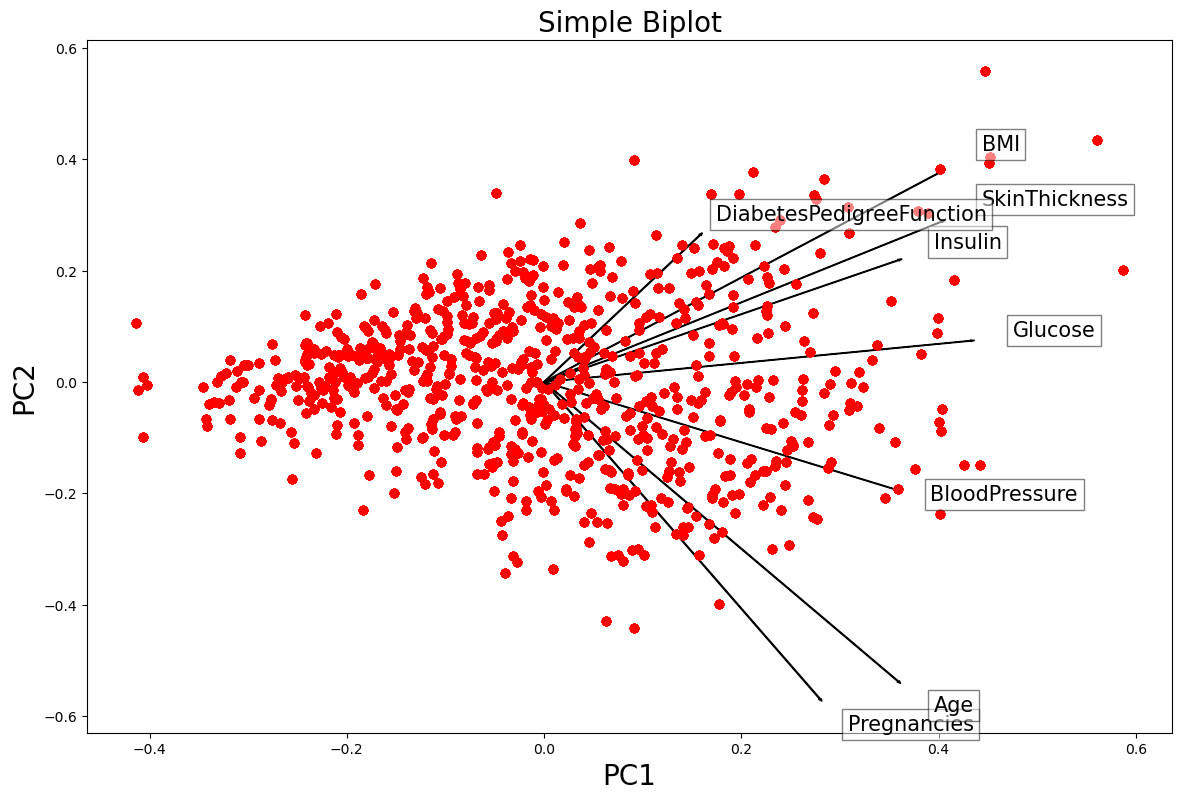

In [42]:
# Simple Biplots
fig, ax = plt.subplots(figsize=(14, 9))        # Set figure and size


for i, feature in enumerate(features):        # Iterate over features/variables
    ax.arrow(0,                               # Plot arrows
            0,
            loadings[0, i],
            loadings[1, i])
    
    # Adjust the label position to avoid overlap
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    
    # Add a bounding box around the text to prevent overlap
    ax.text(label_x, label_y, feature, fontsize=15, bbox=dict(facecolor='white', alpha=0.5)) # Plot arrow text
    
    
    ax.scatter(PC1 * scalePC1,               # Plot data points
               PC2 * scalePC2, 
               c='r', marker='o')  
    
    ax.set_xlabel('PC1',                      # Add annotations
                 fontsize = 20)
    ax.set_ylabel('PC2',
                 fontsize = 20)
    ax.set_title('Simple Biplot',             # Add title
                fontsize = 20)
    plt.savefig('fig_3_pc1_pc2_output.png')
    

### PC1 vs PC3

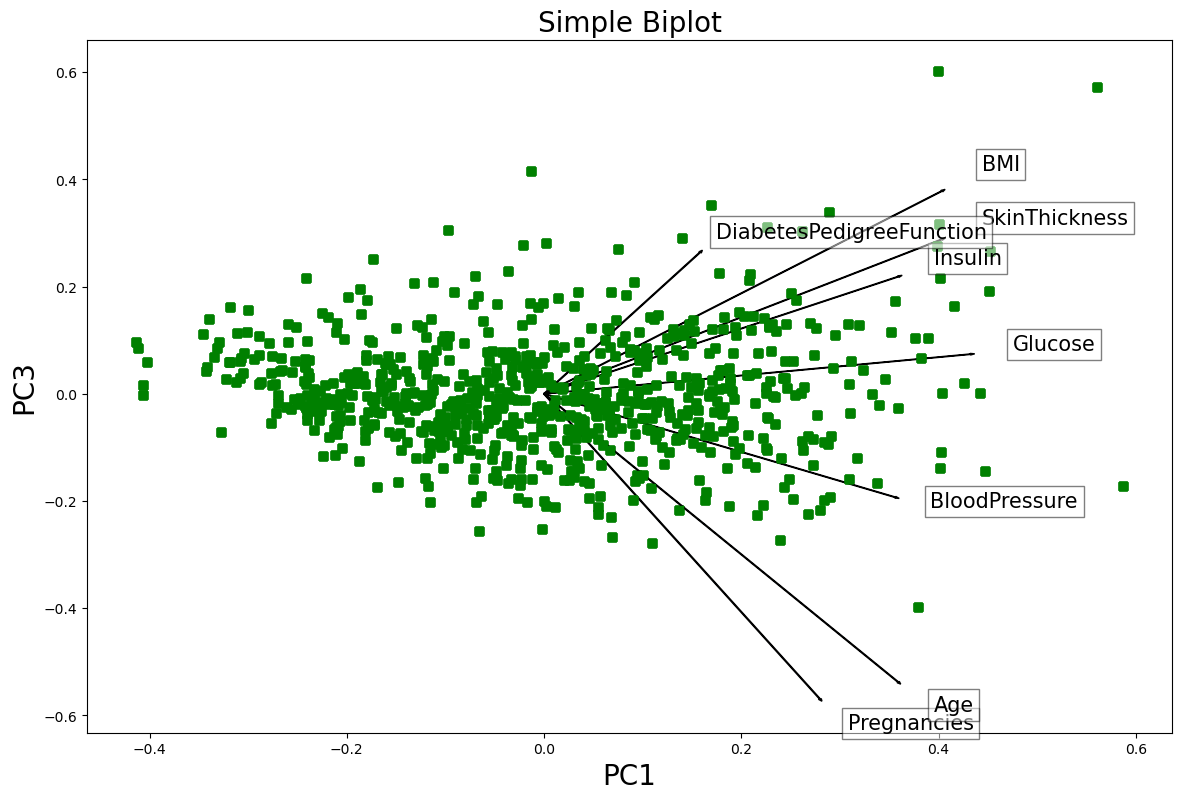

In [43]:
# Simple Biplots
fig, ax = plt.subplots(figsize=(14, 9))        # Set figure and size


for i, feature in enumerate(features):        # Iterate over features/variables
    ax.arrow(0,                               # Plot arrows
            0,
            loadings[0, i],
            loadings[1, i])
    
    
    
    # Adjust the label position to avoid overlap
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    
    # Add a bounding box around the text to prevent overlap
    ax.text(label_x, label_y, feature, fontsize=15, bbox=dict(facecolor='white', alpha=0.5)) # Plot arrow text
    
    ax.scatter(PC1 * scalePC1,               # Plot data points
               PC3 * scalePC3, 
               c='g', marker='s')
    
    ax.set_xlabel('PC1',                      # Add annotations
                 fontsize = 20)
    ax.set_ylabel('PC3',
                 fontsize = 20)
    ax.set_title('Simple Biplot',             # Add title
                fontsize = 20)
    plt.savefig('fig_3_pc1_pc3_output.png')
    

### PC2 vs PC3

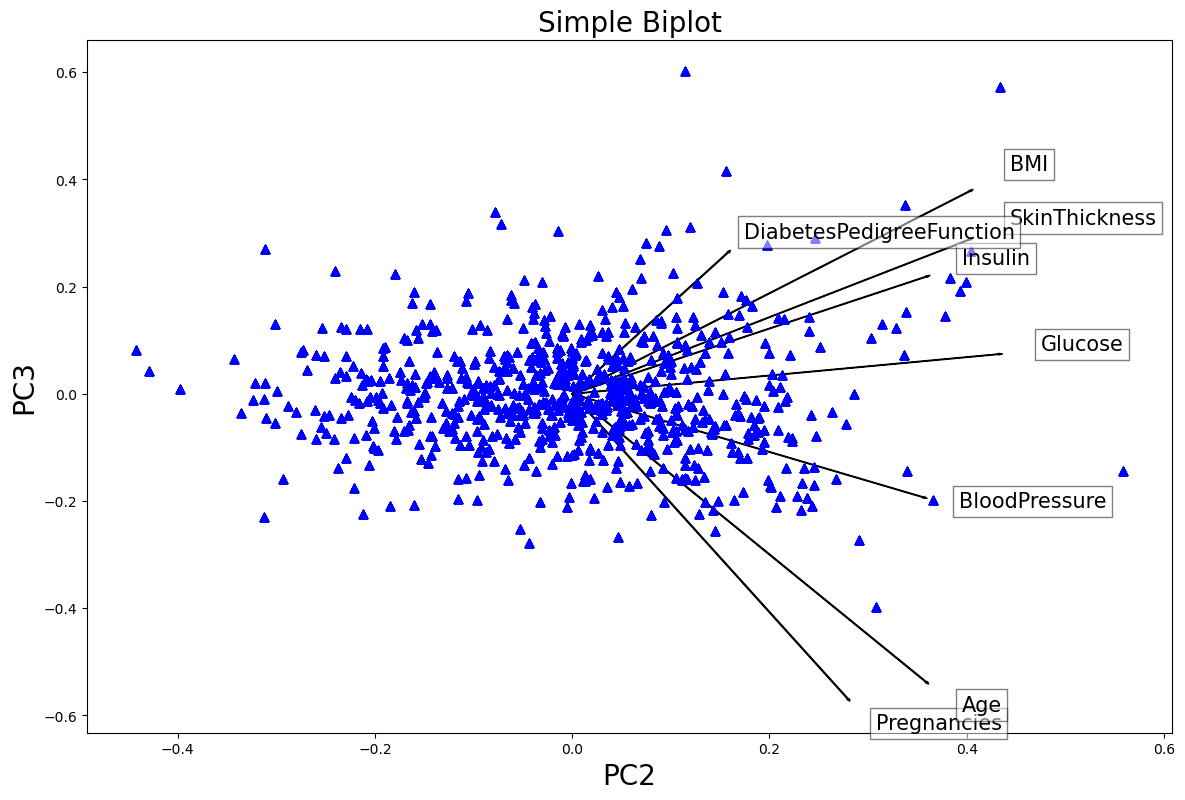

In [44]:
# Simple Biplots
fig, ax = plt.subplots(figsize=(14, 9))        # Set figure and size


for i, feature in enumerate(features):        # Iterate over features/variables
    ax.arrow(0,                               # Plot arrows
            0,
            loadings[0, i],
            loadings[1, i])
    
    
    # Adjust the label position to avoid overlap
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    
    # Add a bounding box around the text to prevent overlap
    ax.text(label_x, label_y, feature, fontsize=15, bbox=dict(facecolor='white', alpha=0.5)) # Plot arrow text
    
    
    ax.scatter(PC2 * scalePC2,                # Plot data points
               PC3 * scalePC3, 
               c='b', marker='^')
    
    ax.set_xlabel('PC2',                      # Add annotations
                 fontsize = 20)
    ax.set_ylabel('PC3',
                 fontsize = 20)
    ax.set_title('Simple Biplot',             # Add title
                fontsize = 20)
    plt.savefig('fig_3_pc2_pc3_output.png')

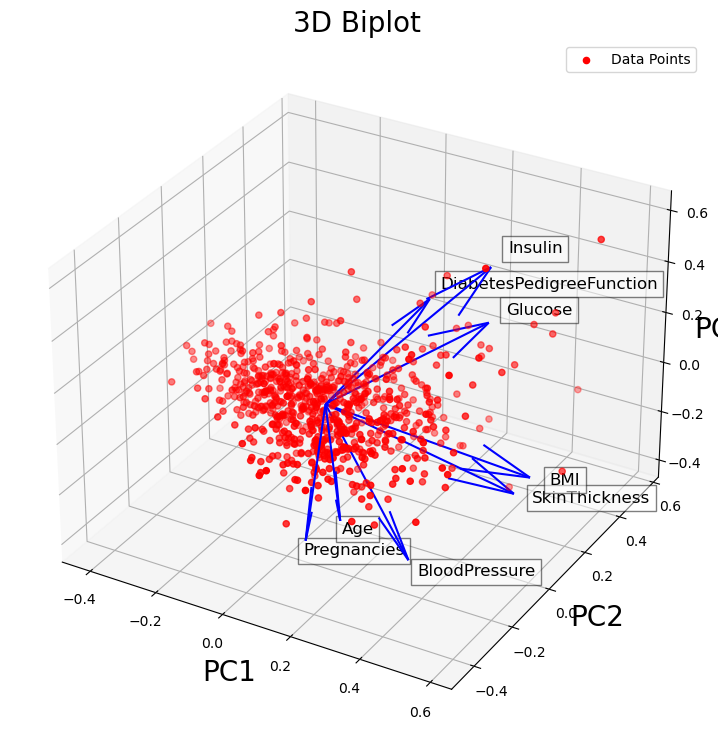

In [45]:
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

for i, feature in enumerate(features):
    ax.quiver(0, 0, 0,  # Plot arrows in 3D
              loadings[0, i],
              loadings[1, i],
              loadings[2, i],
              color='b')
    
    # Adjust the label position to avoid overlap
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    label_z = loadings[2, i] * 1.1
    
    # Add a bounding box around the text to prevent overlap
    ax.text(label_x, label_y, label_z, feature, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Scatter plot for data points in 3D
ax.scatter(PC1 * scalePC1, PC2 * scalePC2, PC3 * scalePC3, c='r', marker='o', label='Data Points')

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)
ax.set_title('3D Biplot', fontsize=20)

plt.legend()
plt.show()

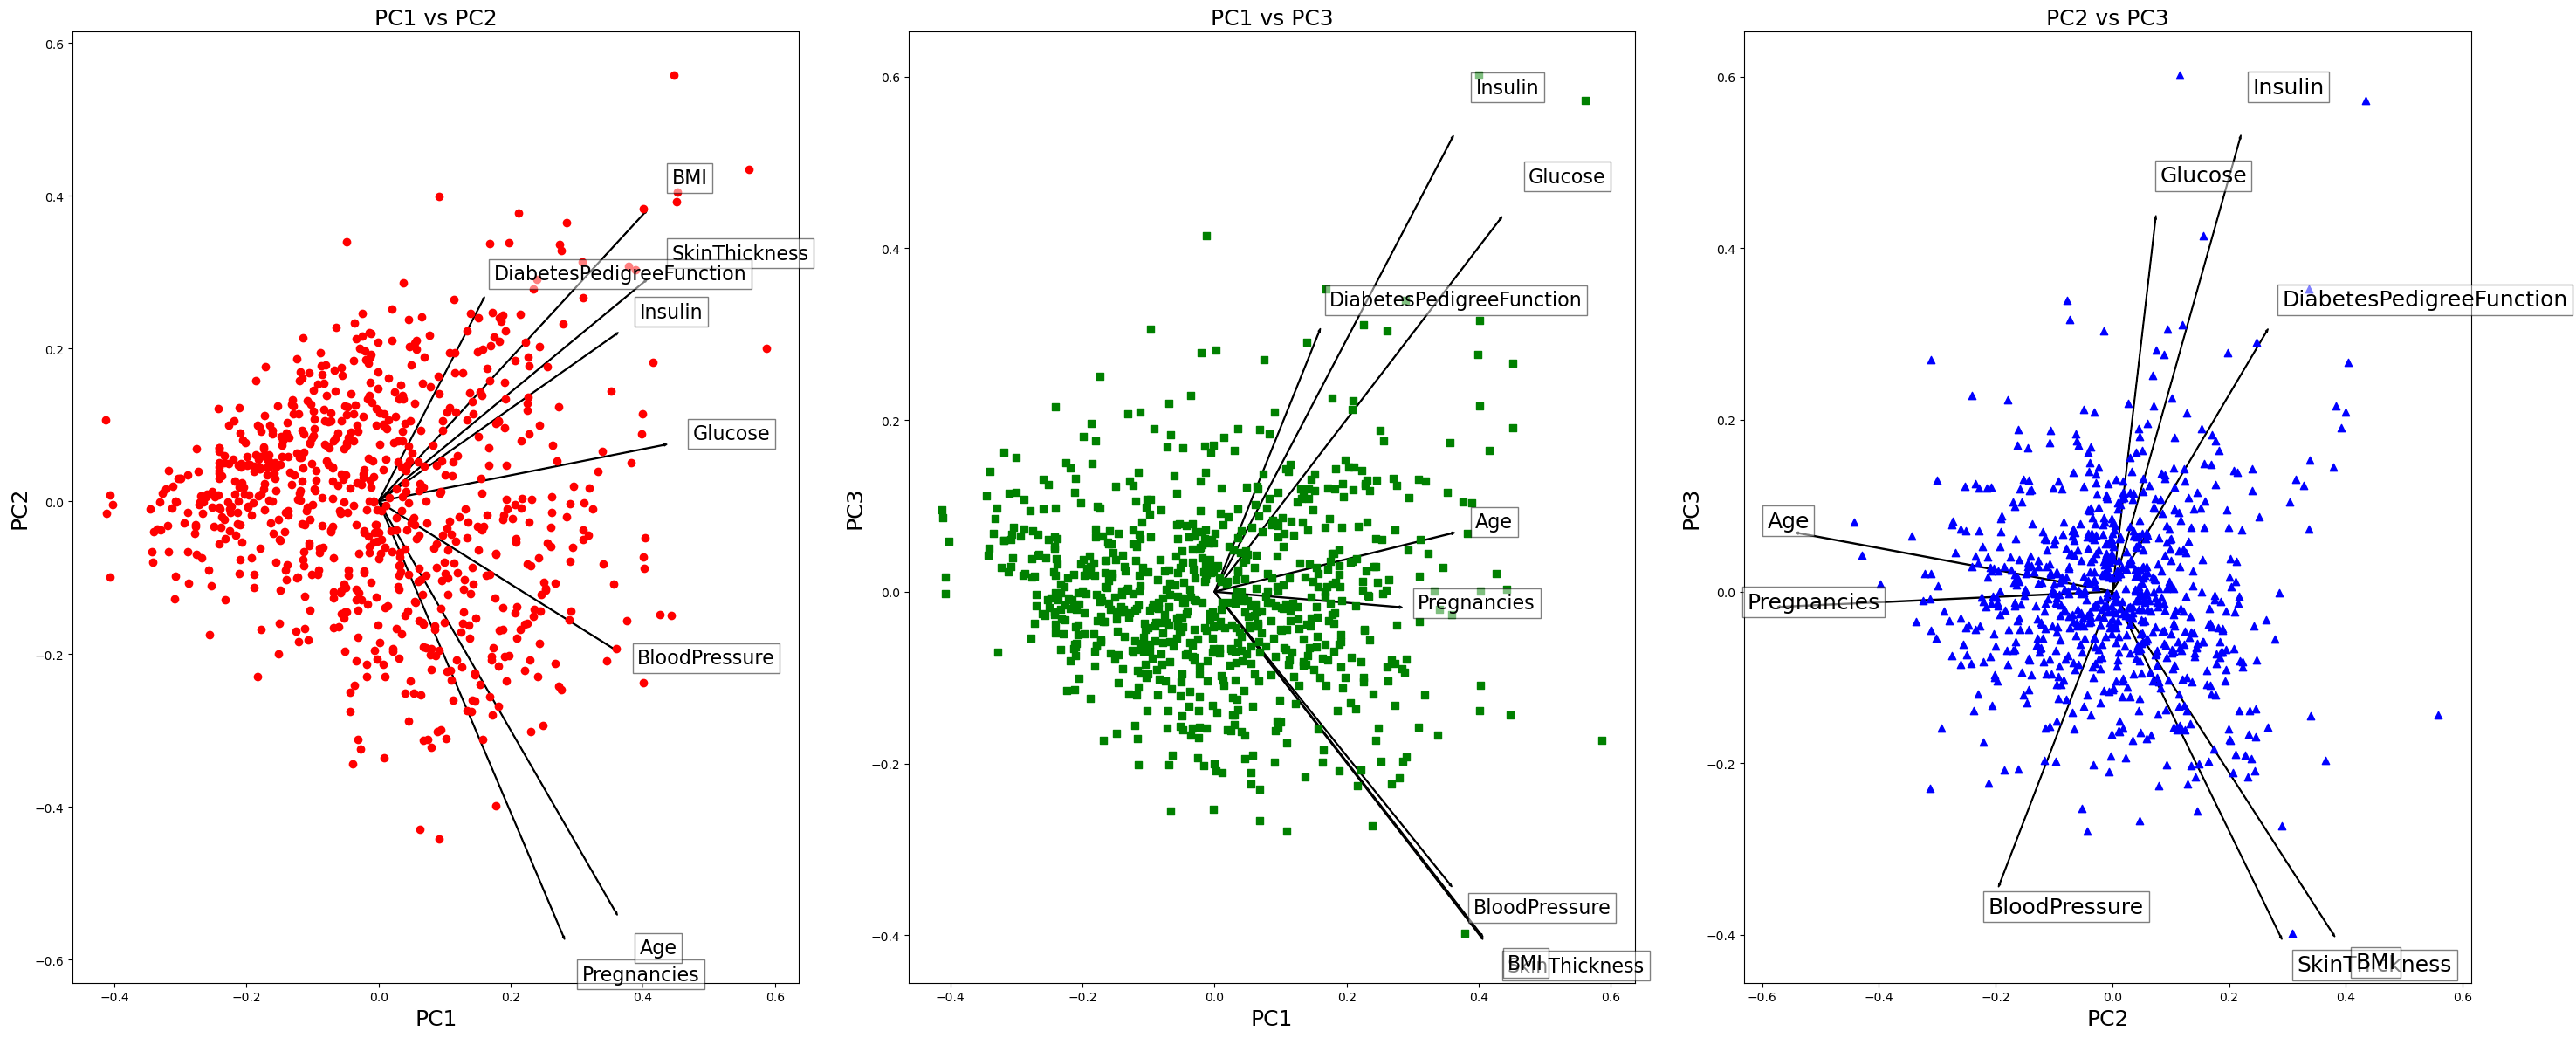

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(30, 12))  # Create subplots for each pair

# Plot PC1 vs PC2
ax = axes[0]
for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[0, i], loadings[1, i])
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    ax.text(label_x, label_y, feature, fontsize=16, bbox=dict(facecolor='white', alpha=0.5))

ax.scatter(PC1 * scalePC1, PC2 * scalePC2, c='r', marker='o')
ax.set_xlabel('PC1', fontsize=18)
ax.set_ylabel('PC2', fontsize=18)
ax.set_title('PC1 vs PC2', fontsize=18)

# Plot PC1 vs PC3
ax = axes[1]
for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[0, i], loadings[2, i])
    label_x = loadings[0, i] * 1.1
    label_y = loadings[2, i] * 1.1
    ax.text(label_x, label_y, feature, fontsize=16, bbox=dict(facecolor='white', alpha=0.5))

ax.scatter(PC1 * scalePC1, PC3 * scalePC3, c='g', marker='s')
ax.set_xlabel('PC1', fontsize=18)
ax.set_ylabel('PC3', fontsize=18)
ax.set_title('PC1 vs PC3', fontsize=18)

# Plot PC2 vs PC3
ax = axes[2]
for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[1, i], loadings[2, i])
    label_x = loadings[1, i] * 1.1
    label_y = loadings[2, i] * 1.1
    ax.text(label_x, label_y, feature, fontsize=18, bbox=dict(facecolor='white', alpha=0.5))

ax.scatter(PC2 * scalePC2, PC3 * scalePC3, c='b', marker='^')
ax.set_xlabel('PC2', fontsize=18)
ax.set_ylabel('PC3', fontsize=18)
ax.set_title('PC2 vs PC3', fontsize=18)

plt.tight_layout()
plt.savefig('fig_4_pca_output.png')
plt.show()

## Using t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [47]:
# Checking the content of features
features

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

### Separate features and target variable

In [48]:
# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Scaling Data : Standardize the features (important for t-SNE)

In [49]:
# Standardize the features (important for t-SNE)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

### Apply t-SNE

In [50]:
# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_standardized)

### Using a new DataFrame for the t-SNE results (Seaborn)

In [51]:
# Create a new DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])
tsne_df['Outcome'] = y

### Visualisation: Plot the t-SNE results using Seaborn

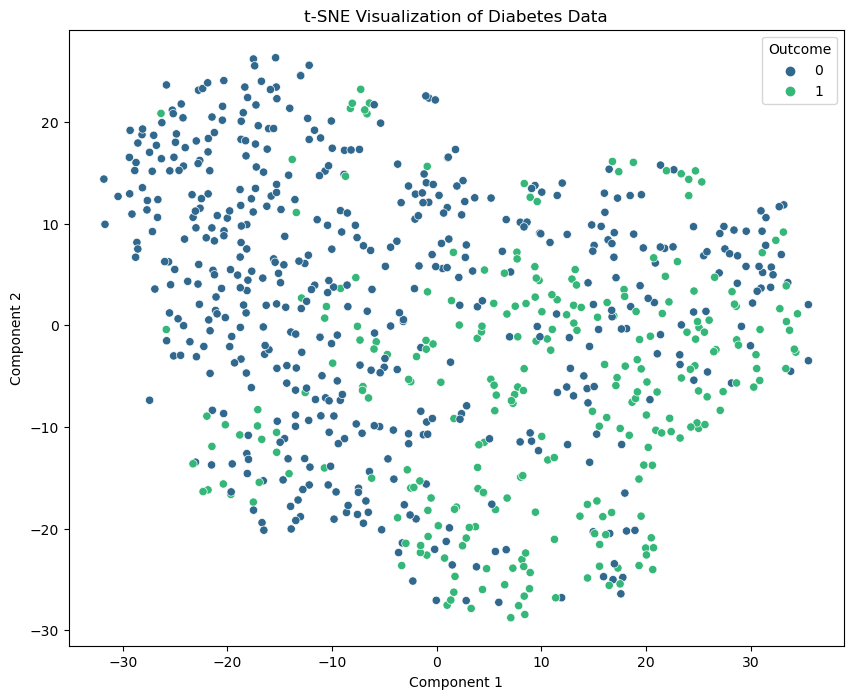

In [52]:
# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Outcome', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization of Diabetes Data')
plt.savefig('fig_5_tsne_output.png')
plt.show()

### Using a new DataFrame for the t-SNE results (Matplotlib)

In [53]:
# Create a new DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Outcome'] = y

### Visualisation: Plot the t-SNE results using Matplotlib alone

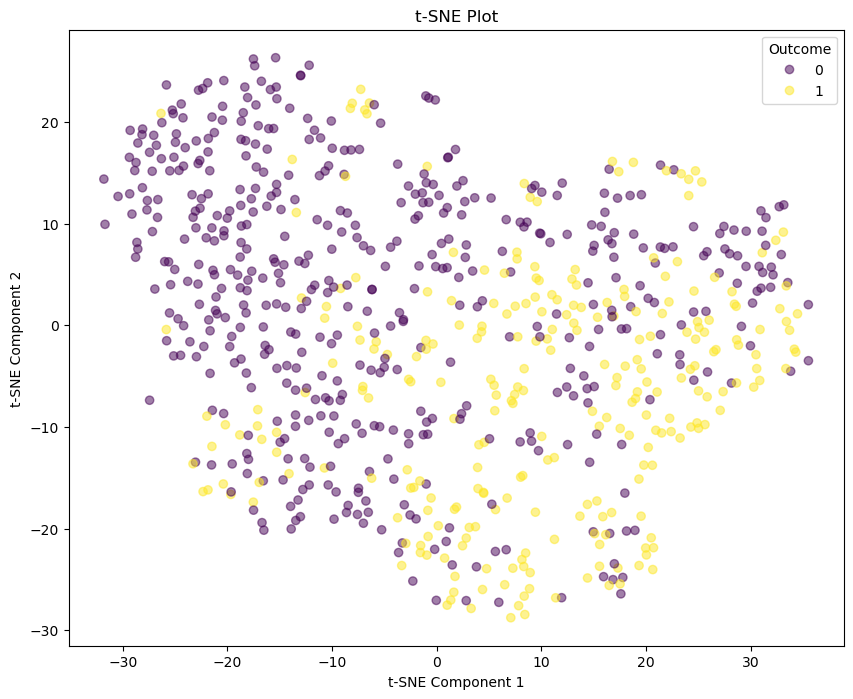

In [54]:
# Plot the t-SNE graph using plt.scatter()
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x='TSNE1', y='TSNE2', data=tsne_df, c='Outcome', cmap='viridis', alpha=0.5)
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(*scatter.legend_elements(), title='Outcome')
plt.show()

## Using MDS (Multi Dimension Scaling)

### Separate features and target variable

In [55]:
# Separate features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Scaling Data : Standardize the features

In [56]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


### Apply MDS to reduce dimensionality

In [57]:
# Apply MDS to reduce dimensionality
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_standardized)

### Using a new DataFrame for the MDS results

In [58]:
# Create a new DataFrame for the MDS results
mds_df = pd.DataFrame(data=X_mds, columns=['MDS1', 'MDS2'])
mds_df['Outcome'] = y

### Visualisation: Plot the MDS results using Seaborn

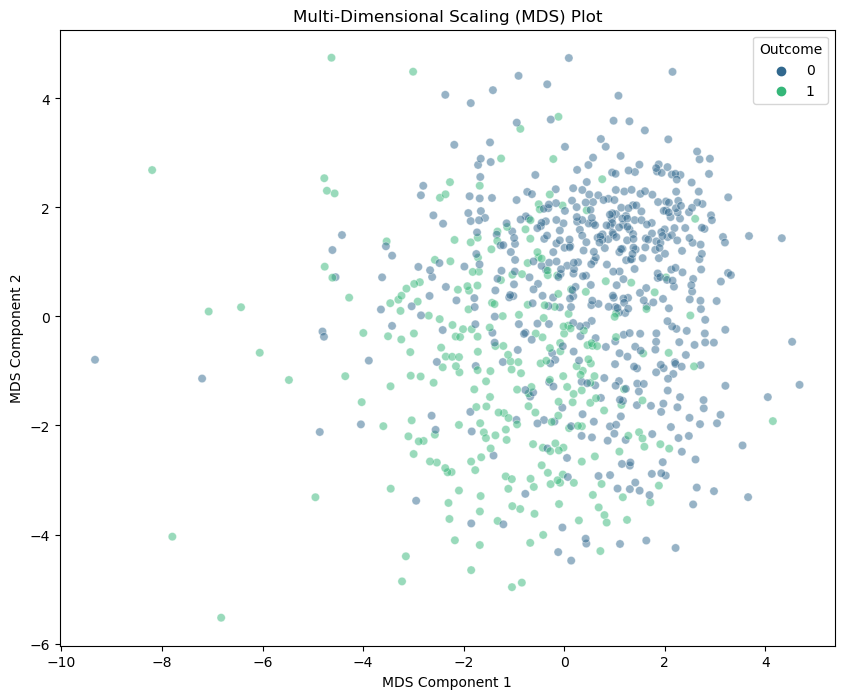

In [59]:
# Plot the MDS graph using sns.scatterplot()
plt.figure(figsize=(10, 8))
sns.scatterplot(x='MDS1', y='MDS2', data=mds_df, hue='Outcome', palette='viridis', alpha=0.5)
plt.title('Multi-Dimensional Scaling (MDS) Plot')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend(title='Outcome')
plt.show()

### Visualisation: Plot the MDS results using Matplotlib alone

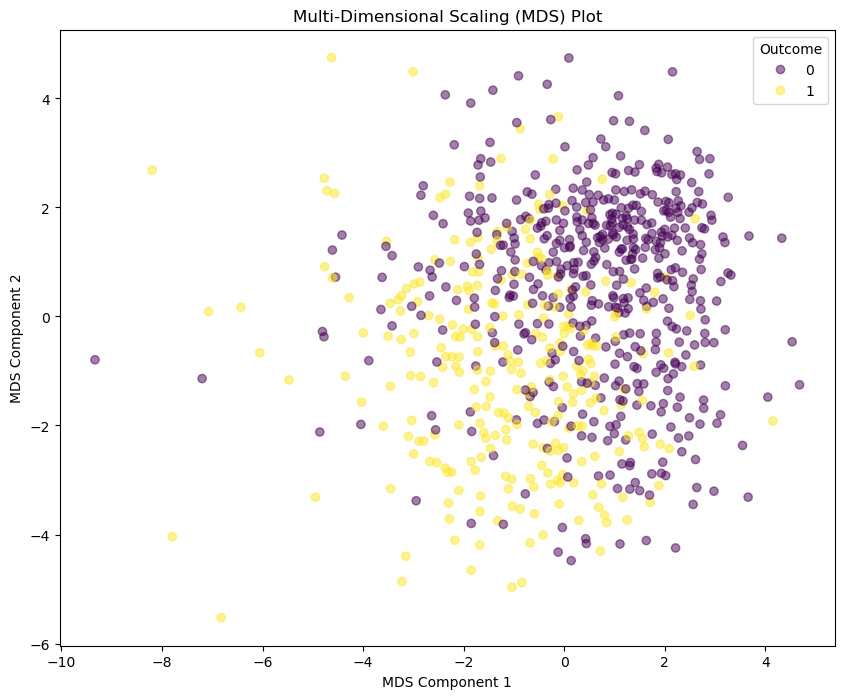

In [60]:
# Plot the MDS graph using plt.scatter()
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x='MDS1', y='MDS2', data=mds_df, c='Outcome', cmap='viridis', alpha=0.5)
plt.title('Multi-Dimensional Scaling (MDS) Plot')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend(*scatter.legend_elements(), title='Outcome')
plt.savefig('fig_6_mds_output.png')
plt.show()

## Building a Logistic Regression Model after applying PCA

In [61]:
# Checking for the value of y
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Standardize the features

In [62]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

### Apply PCA for dimensionality reduction

In [63]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3) # We set n_componenets = 3 because we only had 3 components greater than 1 when variance is set to 1
X_pca = pca.fit_transform(X_standardized)

### Splitting the data into training and testing sets after applying PCA

In [64]:
# Split the data into training and testing sets
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### Building the Logistic Regression model

In [65]:
# Build Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Make predictions on the test set

In [66]:
# Make predictions on the test set
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_classes = (y_pred > 0.5).astype(int)

In [67]:
print(type(y_pred_classes))

<class 'numpy.ndarray'>


In [68]:
print(type(y_test))

<class 'pandas.core.series.Series'>


### Evaluate the model

In [69]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred)

### Display the results obtained

In [70]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.77
Runtime: 93.33 ms
Confusion Matrix:
[[81 18]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


Log Loss: 0.45150447217146766


### Plotting the confusion matrix

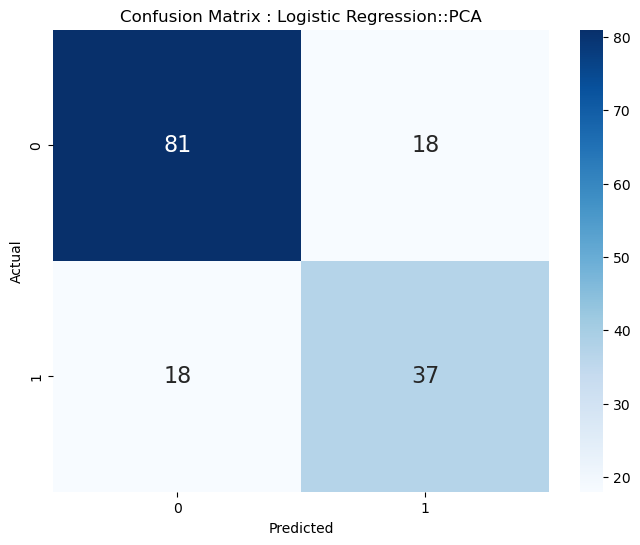

In [71]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix : Logistic Regression::PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

In [72]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

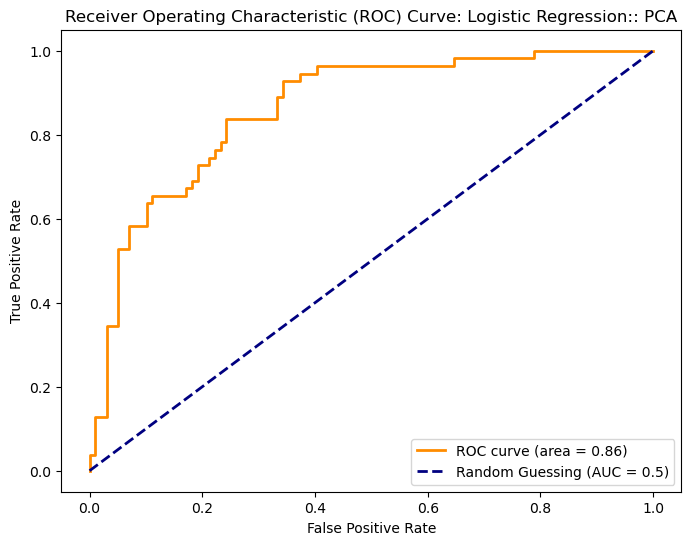

In [73]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Logistic Regression:: PCA')
plt.legend(loc='lower right')
plt.savefig('fig_7_a_logistic_regression_pca_roc_output.png')
plt.show()

In [74]:
#The function below builds the model and returns cross validation scores, train score and learning curve data
def log_learn_curve(X,y,c,n_components=None):
        ''' param X: Matrix of input features
            param y: Vector of Target/Label
            c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
        '''
        '''We aren't splitting the data into train and test because we will use StratifiedKFoldCV.
           KFold CV is a preferred method compared to hold out CV, since the model is tested on all the examples.
           Hold out CV is preferred when the model takes too long to train and we have a huge test set that truly represents the universe
           n_components: Number of principal components for PCA. If None, PCA will not be applied
        '''
    
        le = LabelEncoder() # Label encoding the target
        sc = StandardScaler() # Scaling the input features
        y = le.fit_transform(y)#Label Encoding the target
        
        if n_components is not None:
            pca = PCA(n_components=n_components)
            X = pca.fit_transform(X)
    
        log_reg = LogisticRegression(max_iter=200, random_state=11, C=c)  # LogisticRegression model
    
        # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
        lr = Pipeline(steps=[('scaler', sc), ('classifier', log_reg)])
    
        cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
        cv_scores = cross_val_score(lr, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
        lr.fit(X, y)  # Fitting the model

        train_score = lr.score(X, y)  # Scoring the model on the train set
    
        # Building the learning curve
        train_size, train_scores, test_scores = learning_curve(estimator=lr, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
        train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
        test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
        lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
        return {"cv_scores":cv_scores,
           "train_score":train_score,
           "learning_curve":lc}


### The Learning curve of a Logistic Regression Model with PCA used

Cross Validation Accuracies:
-------------------------
[0.7792207792207793, 0.7532467532467533, 0.7207792207792207, 0.7516339869281046, 0.7777777777777778]

Mean Cross Validation Accuracy:
-------------------------
0.7565317035905271

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.021350449062090708

Training Accuracy:
---------------
0.7591145833333334




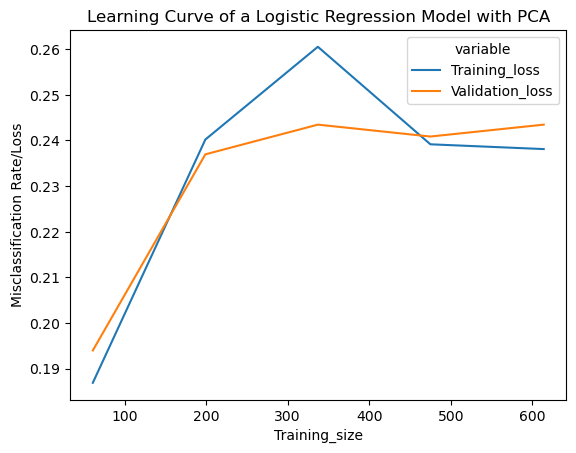

In [75]:
lc = log_learn_curve(X,y,1,n_components=3)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Logistic Regression Model with PCA")
plt.ylabel("Misclassification Rate/Loss");
plt.savefig('fig_7_b_logistic_regression_pca_learning_curve_output.png')

## Building a Logistic Regression Model after applying t-SNE

### Standardize the data

In [76]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply t-SNE for dimensionality reduction

In [77]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

### Split the t-SNE-transformed data into training and testing sets

In [78]:
# Split the t-SNE-transformed data into training and testing sets
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

### Build Logistic Regression model

In [79]:
# Build Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Make predictions on the test set

In [80]:
# Make predictions on the test set
y_pred = logreg.predict_proba(X_test)[:, 1]
y_pred_classes = (y_pred > 0.5).astype(int)

### Evaluate the model

In [81]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred)

### Display results

In [82]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.69
Runtime: 44.46 ms
Confusion Matrix:
[[76 23]
 [25 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        99
           1       0.57      0.55      0.56        55

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154


Log Loss: 0.5196351328050012


### Plotting the confusion matrix

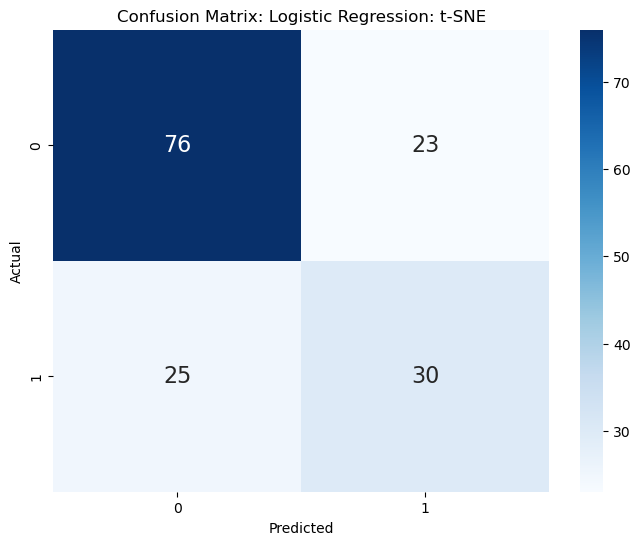

In [83]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix: Logistic Regression: t-SNE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

In [84]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

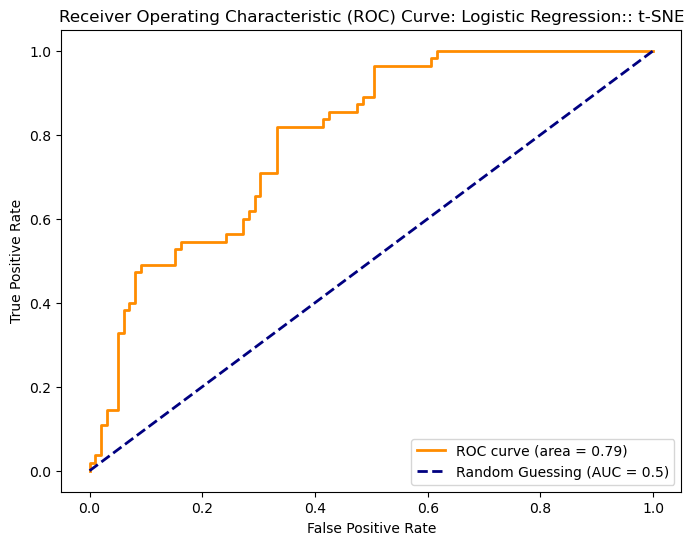

In [85]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Logistic Regression:: t-SNE')
plt.legend(loc='lower right')
plt.savefig('fig_8_a_logistic_regression_t-sne_roc_output.png')
plt.show()

### Plot the t-SNE visualization

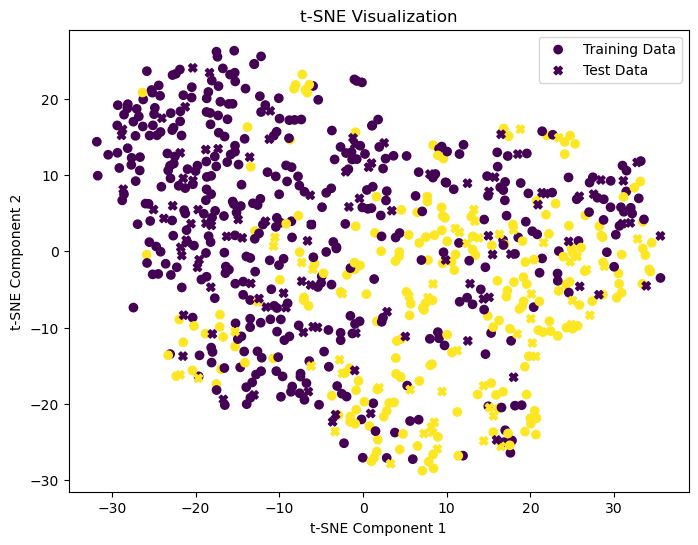

In [86]:
# Plot the t-SNE visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Training Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='X', label='Test Data')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

In [87]:
def log_learn_curve_tsne(X, y, c, n_components=2, perplexity=30):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
    n_components: Number of dimensions for t-SNE. Default is 2 for visualization.
    perplexity: Perplexity parameter for t-SNE.
    '''
    
    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=11)
    X_tsne = tsne.fit_transform(X)
    
    log_reg = LogisticRegression(max_iter=200, random_state=11, C=c)  # LogisticRegression model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    lr = Pipeline(steps=[('scaler', sc), ('classifier', log_reg)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr, X_tsne, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    lr.fit(X_tsne, y)  # Fitting the model

    train_score = lr.score(X_tsne, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=lr, X=X_tsne, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of a Logistic Regression Model with t-SNE used

Cross Validation Accuracies:
-------------------------
[0.8701298701298701, 0.8376623376623377, 0.8051948051948052, 0.8562091503267973, 0.8366013071895425]

Mean Cross Validation Accuracy:
-------------------------
0.8411594941006706

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.021873458158071117

Training Accuracy:
---------------
0.8411458333333334




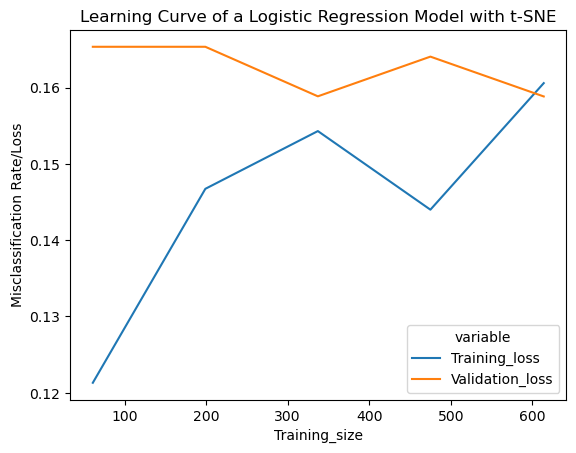

In [88]:
lc_tsne = log_learn_curve_tsne(X,y,1,n_components=2, perplexity=30)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc_tsne["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc_tsne["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc_tsne["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc_tsne["train_score"]}\n\n')
sns.lineplot(data=lc_tsne["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Logistic Regression Model with t-SNE")
plt.ylabel("Misclassification Rate/Loss")
plt.savefig('fig_8_b_logistic_regression_t-sne_learning_curve_output.png')

## Building a Logistic Regression Model after applying Multi Dimensional Scaling (MDS)

### Standardize the data

In [89]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply MDS for dimensionality reduction

In [90]:
# Apply MDS for dimensionality reduction
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

### Split the MDS-transformed data into training and testing sets

In [91]:
# Split the MDS-transformed data into training and testing sets
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_mds, y, test_size=0.2, random_state=42)

### Build Logistic Regression model

In [92]:
# Build Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Make predictions on the test set

In [93]:
# Make predictions on the test set
y_pred = logreg.predict_proba(X_test)[:, 1]
y_pred_classes = (y_pred > 0.5).astype(int)

### Evaluate the model

In [94]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred)

### Display the results

In [95]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.75
Runtime: 58.69 ms
Confusion Matrix:
[[82 17]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154


Log Loss: 0.4995198584339647


### Plot the confusion matrix

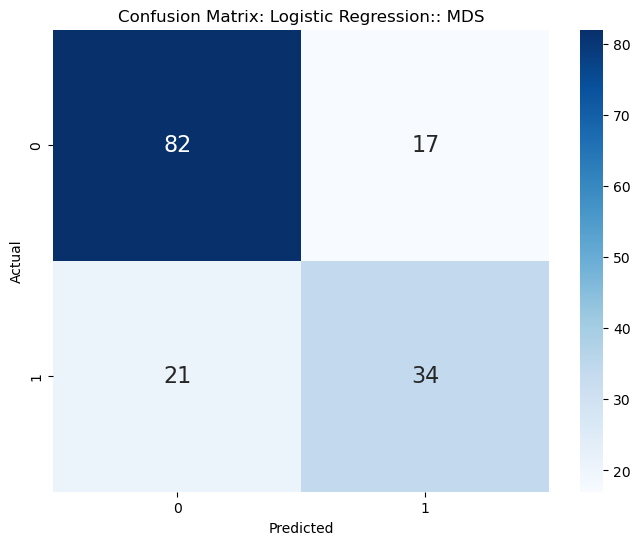

In [96]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix: Logistic Regression:: MDS')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

In [97]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

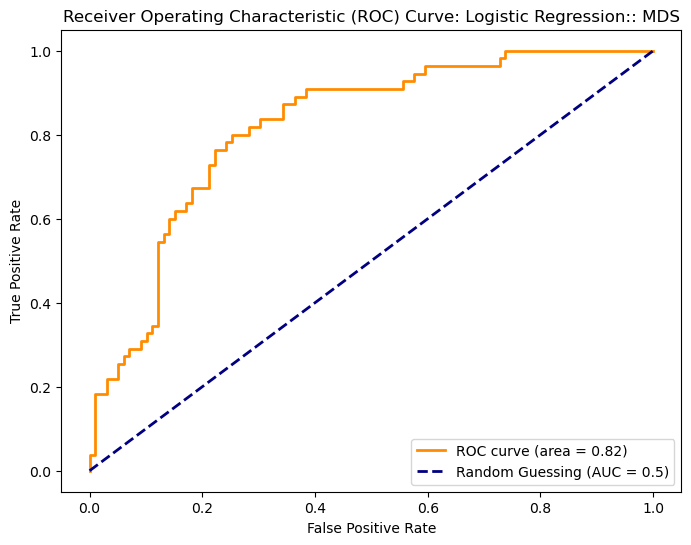

In [98]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Logistic Regression:: MDS')
plt.legend(loc='lower right')
plt.savefig('fig_9_a_logistic_regression_mds_roc_output.png')
plt.show()

In [99]:
def log_learn_curve_mds(X, y, c, n_components=None):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
    n_components: Number of dimensions for MDS. If None, MDS will not be applied.
    '''

    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    if n_components is not None:
        mds = MDS(n_components=n_components, random_state=11)
        X = mds.fit_transform(X)
    
    log_reg = LogisticRegression(max_iter=200, random_state=11, C=c)  # LogisticRegression model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    lr = Pipeline(steps=[('scaler', sc), ('classifier', log_reg)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    lr.fit(X, y)  # Fitting the model

    train_score = lr.score(X, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=lr, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of a Logistic Regression Model with MDS used

Cross Validation Accuracies:
-------------------------
[0.7662337662337663, 0.7792207792207793, 0.7142857142857143, 0.7581699346405228, 0.7647058823529411]

Mean Cross Validation Accuracy:
-------------------------
0.7565232153467447

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.022195262665680053

Training Accuracy:
---------------
0.8411458333333334




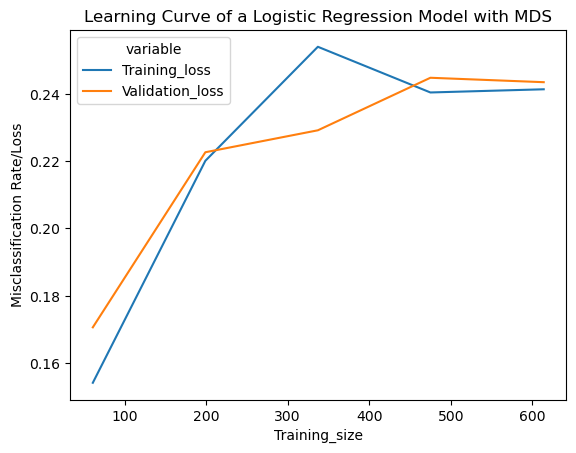

In [100]:
lc_mds = log_learn_curve_mds(X,y,1,n_components=2)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc_mds["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc_mds["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc_mds["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc_tsne["train_score"]}\n\n')
sns.lineplot(data=lc_mds["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Logistic Regression Model with MDS")
plt.ylabel("Misclassification Rate/Loss");
plt.savefig('fig_9_b_logistic_regression_mds_learning_curve_output.png')

## Building a Logistic Regression Model with no dimensionality reduction techniques

### Standardizing the features

In [101]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Split the data into training and testing sets

In [102]:
# Split the data into training and testing sets
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [103]:
# Building and training the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Making predictions on the test set

In [104]:
# Making predictions on the test set
y_pred = model.predict_proba(X_test)[:, 1]
y_pred_classes = (y_pred > 0.5).astype(int)

In [105]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [106]:
print(type(y_test))

<class 'pandas.core.series.Series'>


### Evaluate the model

In [107]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred)

### Displaying the results

In [108]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.77
Runtime: 86.36 ms
Confusion Matrix:
[[83 16]
 [19 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


Log Loss: 0.4706087039806998


### Plotting the confusion matrix

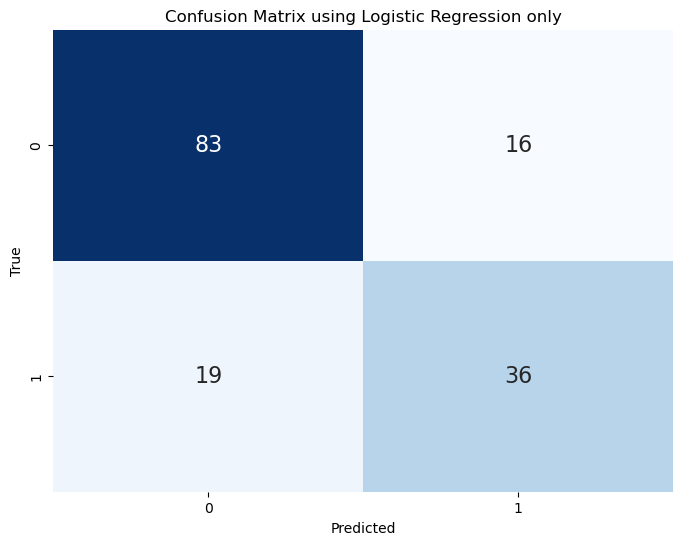

In [109]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using Logistic Regression only')
plt.show()

### ROC Curve

In [110]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

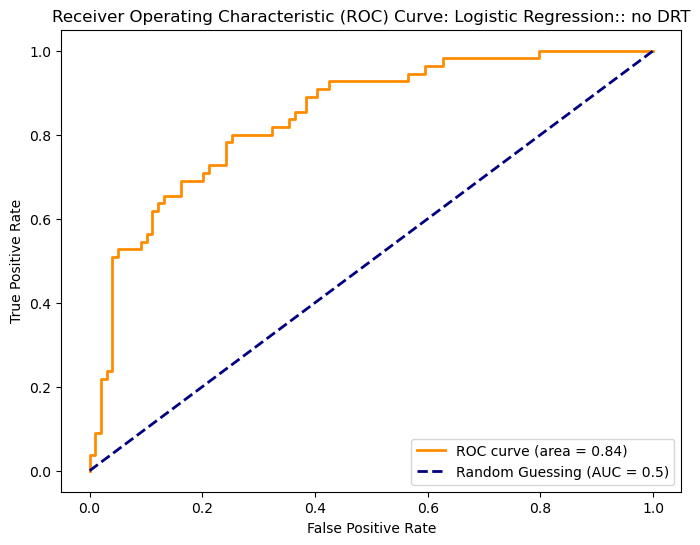

In [111]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Logistic Regression:: no DRT')
plt.legend(loc='lower right')
plt.savefig('fig_10_a_logistic_regression_no_drt_roc_output.png')
plt.show()

### The Learning curve of a Logistic Regression Model with no dimensionality reduction technique used

Cross Validation Accuracies:
-------------------------
[0.7662337662337663, 0.7857142857142857, 0.7402597402597403, 0.7712418300653595, 0.7973856209150327]

Mean Cross Validation Accuracy:
-------------------------
0.7721670486376369

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.019357893571016062

Training Accuracy:
---------------
0.7760416666666666




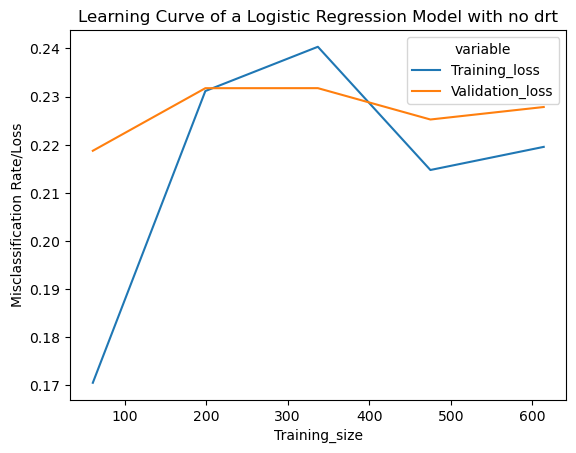

In [112]:
lc = log_learn_curve(X,y,1)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Logistic Regression Model with no drt")
plt.ylabel("Misclassification Rate/Loss");
plt.savefig('fig_10_b_logistic_regression_no_drt_learning_curve_output.png')

## Building a Support Vector Machine Model after applying PCA

### Standardize the features

In [113]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

### Apply PCA for dimensionality reduction

In [114]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3) # We set n_componenets = 3 because when we have only 3 components when variance is 1
X_pca = pca.fit_transform(X_standardized)

### Splitting into train and test sets after applying PCA

In [115]:
# Split the data into training and testing sets
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### Building and training the Support Vector Machine (SVM) model

In [116]:
# Building and training the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=42, probability=True) # Ensure probability estimation for ROC curve
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

### Make predictions on the test set

In [117]:
# Making predictions on the test set
y_pred = svm_model.predict_proba(X_test)[:, 1]
y_pred_classes = (y_pred > 0.5).astype(int)

In [118]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [119]:
print(type(y_test))

<class 'pandas.core.series.Series'>


### Evaluate the model

In [120]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred)

### Displaying the results

In [121]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.79
Runtime: 128.67 ms
Confusion Matrix:
[[85 14]
 [19 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        99
           1       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154


Log Loss: 0.44772183323695036


### Plotting the confusion matrix

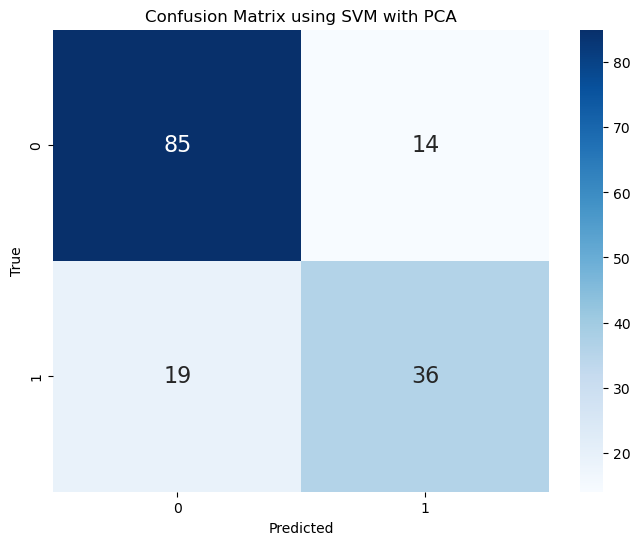

In [122]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix using SVM with PCA')
plt.show()

### ROC Curve

In [123]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

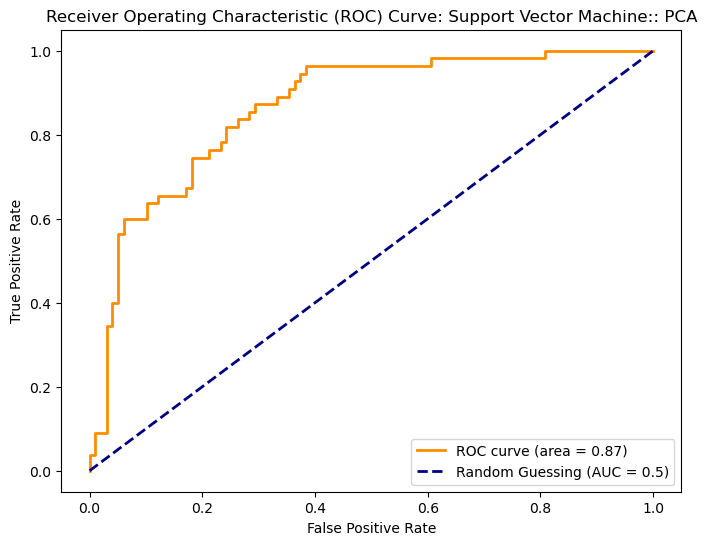

In [124]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Support Vector Machine:: PCA')
plt.legend(loc='lower right')
plt.savefig('fig_11_a_svm_pca_roc_output.png')
plt.show()

In [125]:
def svc_learn_curve(X, y, c, n_components=None):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    c: Regularization parameter for the SVC
    n_components: Number of principal components for PCA. If None, PCA will not be applied.
    '''
    
    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    if n_components is not None:
        pca = PCA(n_components=n_components)
        X = pca.fit_transform(X)
    
    svc = SVC(C=c, kernel='linear', random_state=11)  # Support Vector Classifier (SVC) model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    svm = Pipeline(steps=[('scaler', sc), ('classifier', svc)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(svm, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    svm.fit(X, y)  # Fitting the model

    train_score = svm.score(X, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=svm, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of Support Vector Machine with PCA used

Cross Validation Accuracies:
-------------------------
[0.7727272727272727, 0.7662337662337663, 0.7467532467532467, 0.7647058823529411, 0.7777777777777778]

Mean Cross Validation Accuracy:
-------------------------
0.7656395891690009

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.010540300428092194

Training Accuracy:
---------------
0.7669270833333334




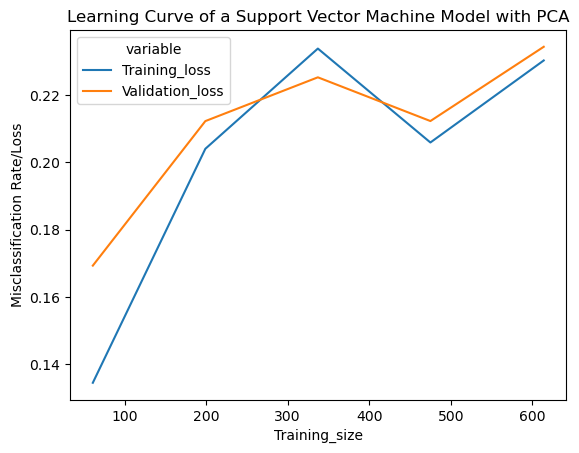

In [126]:
lc = svc_learn_curve(X,y,1,n_components=3)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Support Vector Machine Model with PCA")
plt.ylabel("Misclassification Rate/Loss");
plt.savefig('fig_11_a_svm_pca_learning_curve_output.png')

## Building a Support Vector Machine Model after applying t-SNE

### Standardize the data

In [127]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply t-SNE for dimensionality reduction

In [128]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

### Split the t-SNE-transformed data into training and testing sets

In [129]:
# Split the t-SNE-transformed data into training and testing sets
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

### Build Support Vector Machine (SVM) model

In [130]:
# Build Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=42, probability=True) # Ensure probability estimation for ROC curve
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

### Make predictions on the test set

In [131]:
# Make predictions on the test set
y_pred = svm_model.predict_proba(X_test)[:, 1]
y_pred_classes = (y_pred > 0.5).astype(int)

### Evaluate the model

In [132]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred)

### Display the results

In [133]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.70
Runtime: 326.19 ms
Confusion Matrix:
[[78 21]
 [25 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        99
           1       0.59      0.55      0.57        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154


Log Loss: 0.5253732972286179


### Plot the confusion matrix

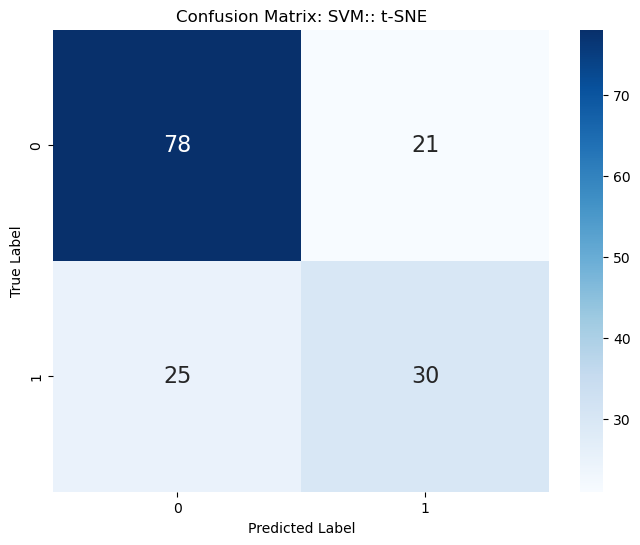

In [134]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix: SVM:: t-SNE')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### ROC Curve

In [135]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

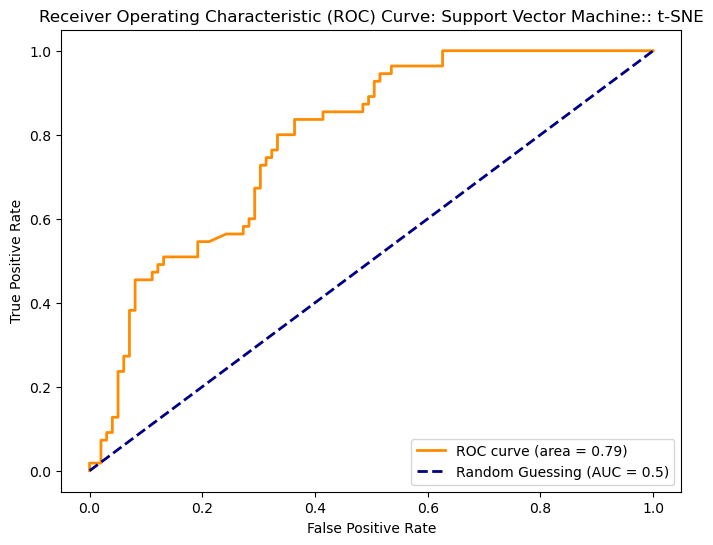

In [136]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Support Vector Machine:: t-SNE')
plt.legend(loc='lower right')
plt.savefig('fig_12_a_svm_tsne_roc_output.png')
plt.show()

In [137]:
def svc_learn_curve_tsne(X, y, c, n_components=None):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    c: Regularization parameter for the SVC
    n_components: Number of dimensions for t-SNE. If None, t-SNE will not be applied.
    '''
    
    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    if n_components is not None:
        tsne = TSNE(n_components=n_components, perplexity=30, random_state=11)
        X = tsne.fit_transform(X)
    
    svc = SVC(C=c, kernel='linear', random_state=11)  # Support Vector Classifier (SVC) model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    svm = Pipeline(steps=[('scaler', sc), ('classifier', svc)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(svm, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    svm.fit(X, y)  # Fitting the model

    train_score = svm.score(X, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=svm, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of a Support Vector Machine with t-SNE used

Cross Validation Accuracies:
-------------------------
[0.8831168831168831, 0.8506493506493507, 0.7987012987012987, 0.8496732026143791, 0.8366013071895425]

Mean Cross Validation Accuracy:
-------------------------
0.8437484084542908

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.0272504170238359

Training Accuracy:
---------------
0.84375




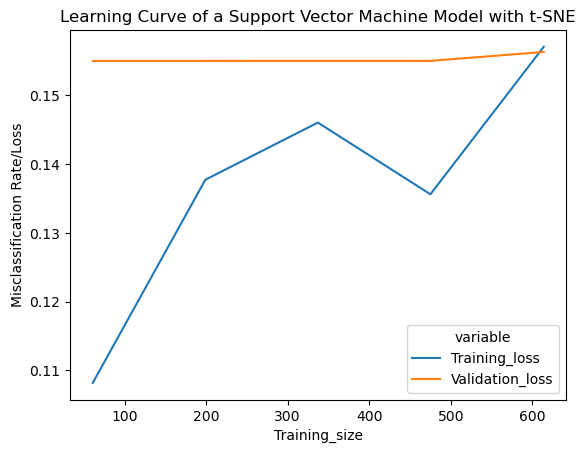

In [138]:
lc_tsne = svc_learn_curve_tsne(X,y,1,n_components=2)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc_tsne["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc_tsne["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc_tsne["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc_tsne["train_score"]}\n\n')
sns.lineplot(data=lc_tsne["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Support Vector Machine Model with t-SNE")
plt.ylabel("Misclassification Rate/Loss");
plt.savefig('fig_12_b_svm_tsne_learning_curve_output.png')

## Building a Support Vector Machine Model after applying MDS

### Standardize the data

In [139]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply Multi-Dimensional Scaling (MDS) for dimensionality reduction

In [140]:
# Apply Multi-Dimensional Scaling (MDS) for dimensionality reduction
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

### Split the MDS-transformed data into training and testing sets

In [141]:
# Split the MDS-transformed data into training and testing sets
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_mds, y, test_size=0.2, random_state=42)

### Build Support Vector Machine (SVM) model

In [142]:
# Build Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=42, probability=True) # Ensure probability estimation for ROC curve
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

### Make predictions on the test set

In [143]:
# Make predictions on the test set
y_pred = svm_model.predict_proba(X_test)[:, 1]
y_pred_classes = (y_pred > 0.5).astype(int)

### Evaluate the model

In [144]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred)

### Display the results

In [145]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.76
Runtime: 105.98 ms
Confusion Matrix:
[[82 17]
 [20 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154


Log Loss: 0.4967750040057867


### Plot the confusion matrix

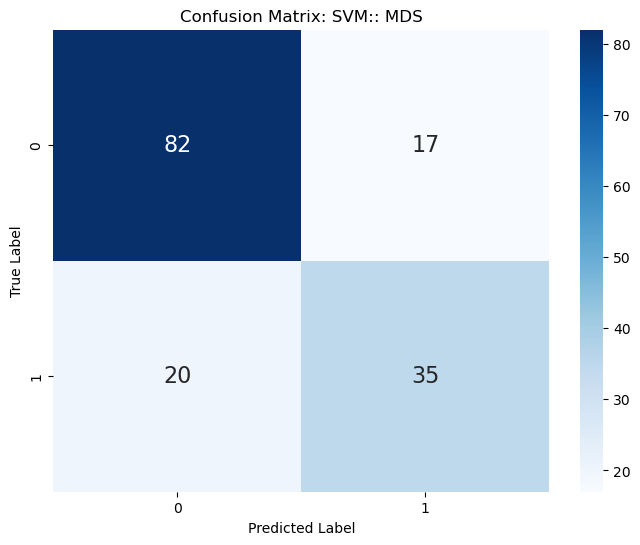

In [146]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix: SVM:: MDS')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### ROC Curve

In [147]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

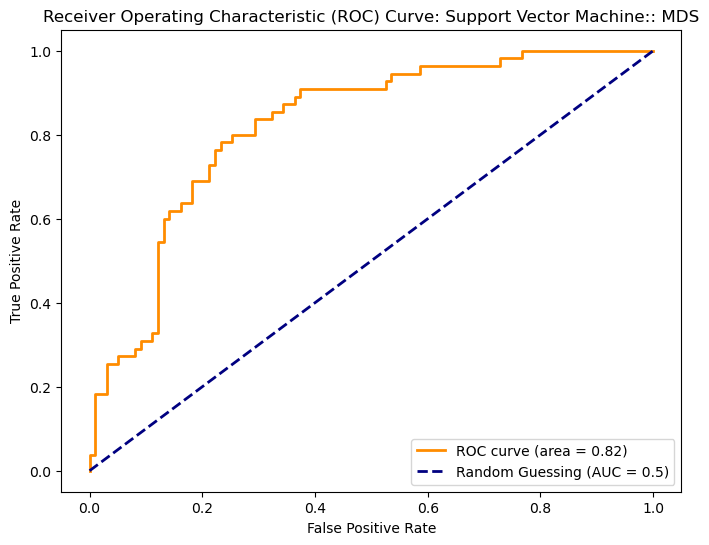

In [148]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Support Vector Machine:: MDS')
plt.legend(loc='lower right')
plt.savefig('fig_13_a_svm_mds_roc_output.png')
plt.show()

In [149]:
def svc_learn_curve_mds(X, y, c, n_components=None):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    c: Regularization parameter for the SVC
    n_components: Number of dimensions for MDS. If None, MDS will not be applied.
    '''
    
    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    if n_components is not None:
        mds = MDS(n_components=n_components, random_state=11)
        X = mds.fit_transform(X)
    
    svc = SVC(C=c, kernel='rbf', random_state=11)  # Support Vector Classifier (SVC) model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    svm = Pipeline(steps=[('scaler', sc), ('classifier', svc)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(svm, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    svm.fit(X, y)  # Fitting the model

    train_score = svm.score(X, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=svm, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of a Support Vector Machine with MDS used

Cross Validation Accuracies:
-------------------------
[0.8831168831168831, 0.8246753246753247, 0.8246753246753247, 0.8627450980392157, 0.8300653594771242]

Mean Cross Validation Accuracy:
-------------------------
0.8450555979967745

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.023736040819545844

Training Accuracy:
---------------
0.84375




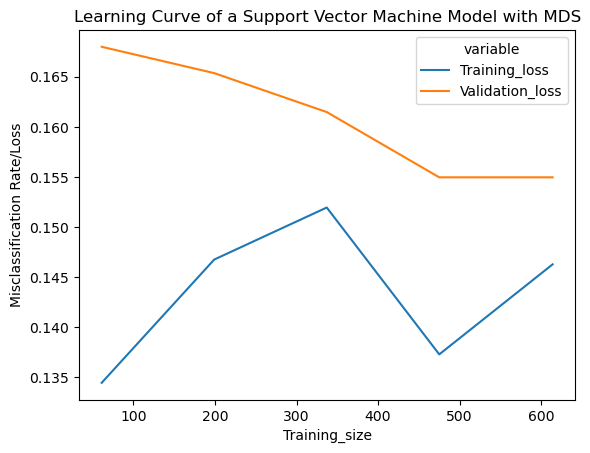

In [150]:
lc_mds = svc_learn_curve_mds(X,y,1,n_components=2)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc_mds["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc_mds["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc_mds["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc_tsne["train_score"]}\n\n')
sns.lineplot(data=lc_mds["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Support Vector Machine Model with MDS")
plt.ylabel("Misclassification Rate/Loss");
plt.savefig('fig_13_b_svm_mds_learnin_curve_output.png')

## Building a Support Vector Machine Model with no dimensionality reduction techniques

### Standardizing the features

In [151]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Split the data into training and testing sets

In [152]:
# Splitting into train and test sets
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

### Building and training the Support Vector Machine (SVM) model

In [153]:
# Building and training the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', random_state=42, probability=True) # Ensure probability estimation for ROC curve
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

### Making predictions on the test set

In [154]:
# Making predictions on the test set
y_pred = svm_model.predict_proba(X_test)[:, 1]
y_pred_classes = (y_pred > 0.5).astype(int)

In [155]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [156]:
print(type(y_test))

<class 'pandas.core.series.Series'>


### Evaluate the model

In [157]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred)

### Displaying the results

In [158]:
# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.79
Runtime: 110.19 ms
Confusion Matrix:
[[86 13]
 [20 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154


Log Loss: 0.4572158868260412


### Plotting the confusion matrix

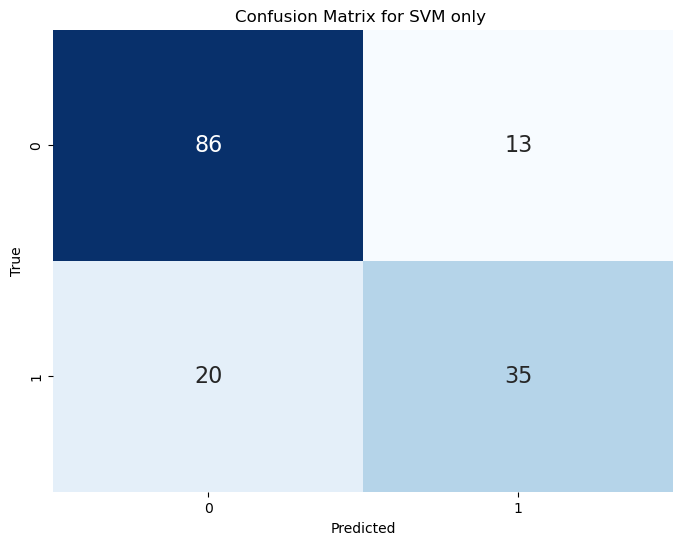

In [159]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM only ')
plt.show()

### ROC Curve

In [160]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

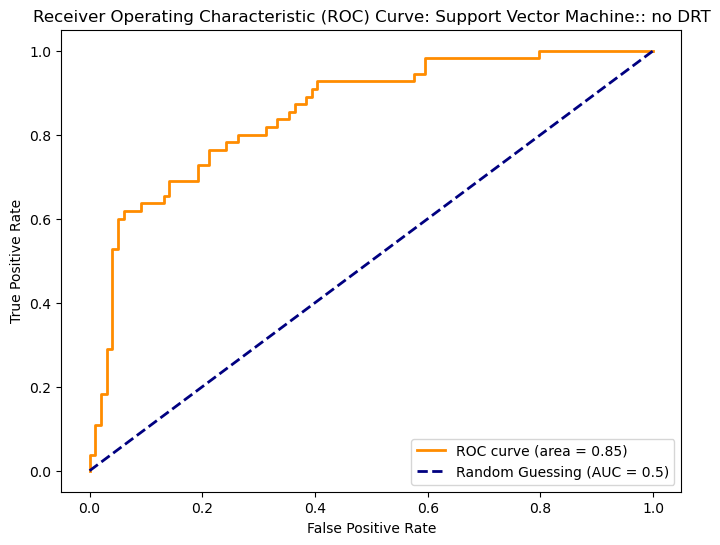

In [161]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Support Vector Machine:: no DRT')
plt.legend(loc='lower right')
plt.savefig('fig_13_a_svm_no_drt_roc_output.png')
plt.show()

### The Learning curve of a Support Vector Machine with no dimensionality reduction technique

Cross Validation Accuracies:
-------------------------
[0.7662337662337663, 0.7857142857142857, 0.7662337662337663, 0.7777777777777778, 0.7908496732026143]

Mean Cross Validation Accuracy:
-------------------------
0.777361853832442

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.00999525937271405

Training Accuracy:
---------------
0.78515625




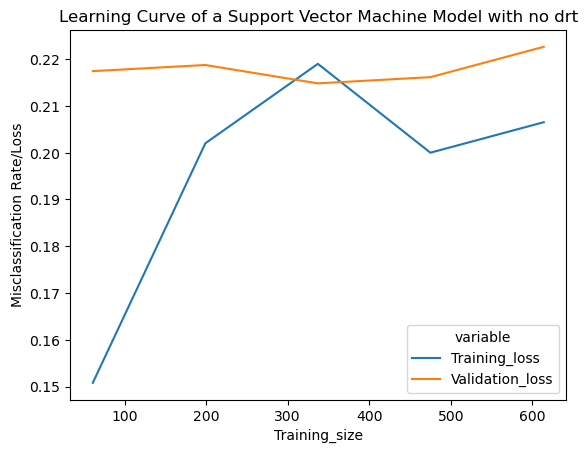

In [162]:
lc = svc_learn_curve(X,y,1)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Support Vector Machine Model with no drt")
plt.ylabel("Misclassification Rate/Loss");
plt.savefig('fig_13_b_svm_no_drt_learning_curve_output.png')

## Building a Random Forest Model after applying PCA

### Standardize the features

In [163]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

### Apply PCA for dimensionality reduction

In [164]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3) # We set n_componenets = 3 because when we have only 3 components when variance is 1
X_pca = pca.fit_transform(X_standardized)

### Splitting into train and test sets after applying PCA

In [165]:
start_time = time.time()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### Build the Random Forest model

In [166]:
# Build the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Make predictions on the test set

In [167]:
# Make predictions on the test set
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_classes = (y_pred_rf > 0.5).astype(int)

In [168]:
print(type(y_pred_rf))

<class 'numpy.ndarray'>


In [169]:
print(type(y_test))

<class 'pandas.core.series.Series'>


### Evaluate the model

In [170]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred_rf)

### Displaying the Evaluation

In [171]:
# Print the results
print(f'Accuracy: {accuracy:.2f}') 
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.79
Runtime: 356.31 ms
Confusion Matrix:
[[77 22]
 [10 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        99
           1       0.67      0.82      0.74        55

    accuracy                           0.79       154
   macro avg       0.78      0.80      0.78       154
weighted avg       0.81      0.79      0.80       154


Log Loss: 0.4527810239585858


### Plotting the confusion matrix

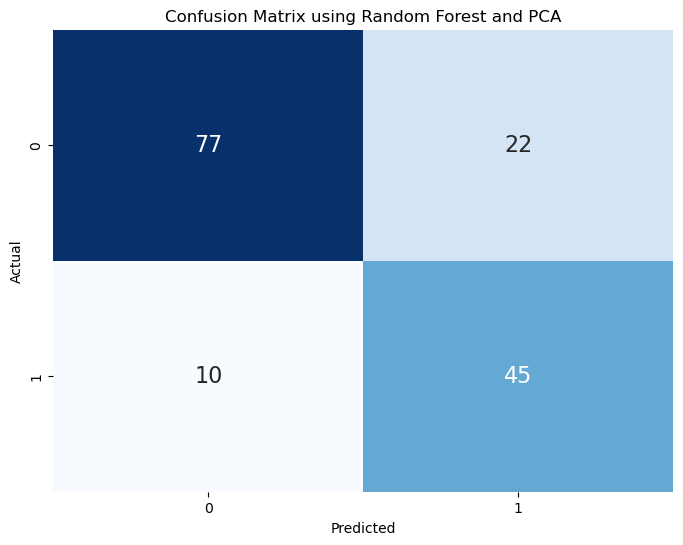

In [172]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix using Random Forest and PCA")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC Curve

In [173]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

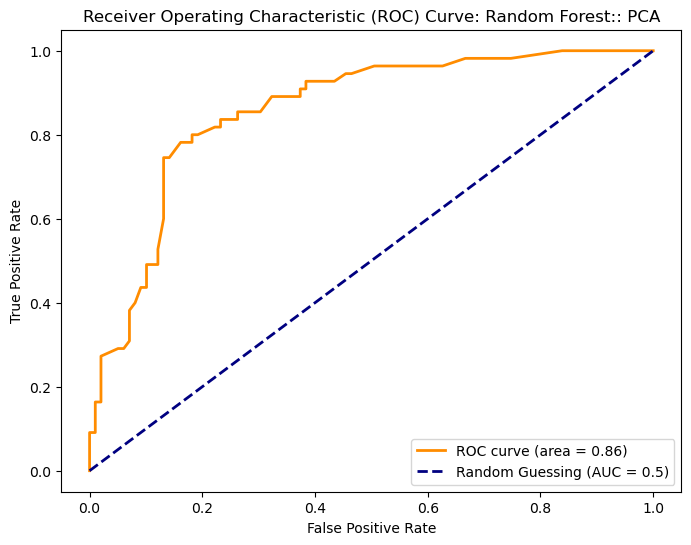

In [174]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Random Forest:: PCA')
plt.legend()
plt.savefig('fig_14_a_rf_pca_roc_output.png')
plt.show()

In [175]:
def random_forest_learn_curve(X, y, n_estimators, max_depth=None, n_components=None):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    n_estimators: The number of trees in the forest
    max_depth: The maximum depth of the tree. If None, nodes are expanded until all leaves are pure.
    n_components: Number of principal components for PCA. If None, PCA will not be applied.
    '''
    
    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    if n_components is not None:
        pca = PCA(n_components=n_components)
        X = pca.fit_transform(X)
    
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=11)  # Random Forest model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    rf_pipeline = Pipeline(steps=[('scaler', sc), ('classifier', rf)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(rf_pipeline, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    rf_pipeline.fit(X, y)  # Fitting the model

    train_score = rf_pipeline.score(X, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=rf_pipeline, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of a Random Forest with PCA used

Cross Validation Accuracies:
-------------------------
[0.8831168831168831, 0.8376623376623377, 0.7987012987012987, 0.8366013071895425, 0.8366013071895425]

Mean Cross Validation Accuracy:
-------------------------
0.838536626771921

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.026767547229791723

Training Accuracy:
---------------
0.8385416666666666




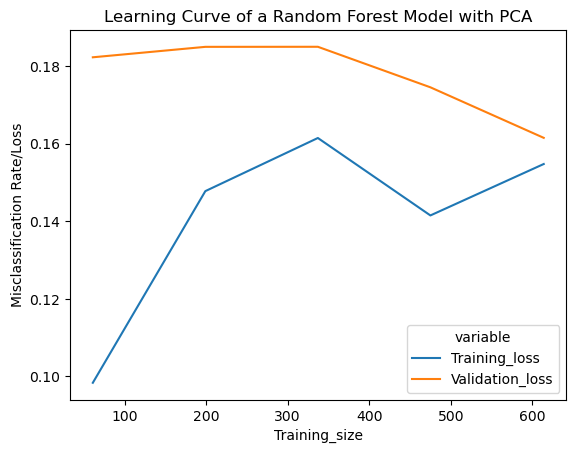

In [176]:
lc = random_forest_learn_curve(X,y,1,max_depth=3, n_components=3)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Random Forest Model with PCA")
plt.ylabel("Misclassification Rate/Loss");
plt.savefig('fig_14_b_rf_pca_learning_curve_output.png')

## Building a Random Forest Model after applying t-SNE

### Standardize the data

In [177]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply t-SNE for dimensionality reduction

In [178]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

### Split the t-SNE-transformed data into training and testing sets

In [179]:
# Split the t-SNE-transformed data into training and testing sets
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

### Build Random Forest model

In [180]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Make predictions on the test set

In [181]:
# Make predictions on the test set
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_classes = (y_pred_rf > 0.5).astype(int)

### Evaluate the model

In [182]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred_rf)

### Displaying the Evaluation

In [183]:
# Print the results
print(f'Accuracy: {accuracy:.2f}') 
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.76
Runtime: 300.63 ms
Confusion Matrix:
[[78 21]
 [16 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154


Log Loss: 0.4950898386232719


### Plot the confusion matrix

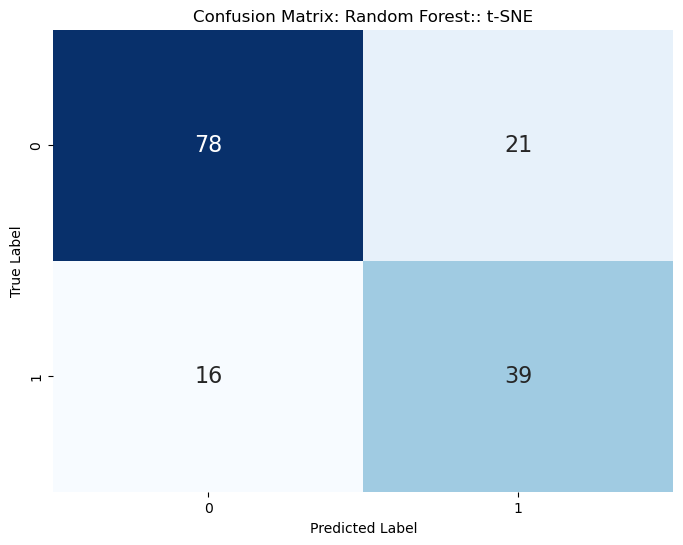

In [184]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix: Random Forest:: t-SNE')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### ROC Curve

In [185]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

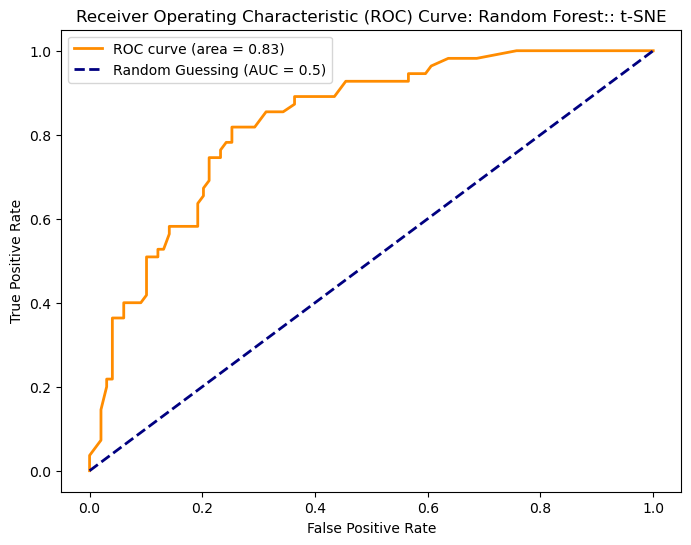

In [186]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Random Forest:: t-SNE')
plt.legend()
plt.savefig('fig_15_a_rf_tsne_roc_output.png')
plt.show()

In [187]:
def rf_learn_curve_tsne(X, y, n_estimators, n_components=None):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    n_estimators: The number of trees in the forest
    n_components: Number of components for t-SNE. If None, t-SNE will not be applied.
    '''
    
    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    if n_components is not None:
        tsne = TSNE(n_components=n_components)
        X = tsne.fit_transform(X)
    
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=11)  # Random Forest model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    rf_pipeline = Pipeline(steps=[('scaler', sc), ('classifier', rf)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(rf_pipeline, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    rf_pipeline.fit(X, y)  # Fitting the model

    train_score = rf_pipeline.score(X, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=rf_pipeline, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of a Random Forest with t-SNE used

Cross Validation Accuracies:
-------------------------
[0.8311688311688312, 0.8181818181818182, 0.8116883116883117, 0.8366013071895425, 0.8169934640522876]

Mean Cross Validation Accuracy:
-------------------------
0.8229267464561583

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.009369590942039546

Training Accuracy:
---------------
0.9166666666666666




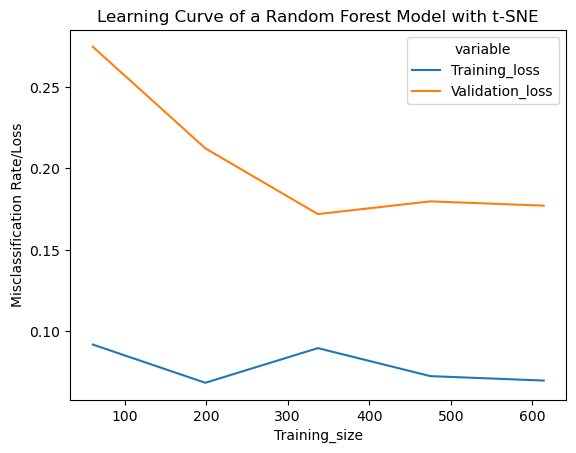

In [188]:
lc_tsne = rf_learn_curve_tsne(X,y,1,n_components=2)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc_tsne["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc_tsne["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc_tsne["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc_tsne["train_score"]}\n\n')
sns.lineplot(data=lc_tsne["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Random Forest Model with t-SNE")
plt.ylabel("Misclassification Rate/Loss");
plt.savefig('fig_15_a_rf_tsne_learning_curve_output.png')

## Building a Random Forest Model after applying Multi Dimensional Scaling (MDS)

### Standardize the data

In [189]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Apply MDS for dimensionality reduction

In [190]:
# Apply MDS for dimensionality reduction
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

### Split the MDS-transformed data into training and testing sets

In [191]:
# Split the MDS-transformed data into training and testing sets
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_mds, y, test_size=0.2, random_state=42)

### Build Random Forest model

In [192]:
# Build Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Make predictions on the test set

In [193]:
# Make predictions on the test set
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_classes = (y_pred_rf > 0.5).astype(int)

### Evaluate the model

In [194]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred_rf)

### Displaying the Evaluation

In [195]:
# Print the results
print(f'Accuracy: {accuracy:.2f}') 
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.70
Runtime: 307.83 ms
Confusion Matrix:
[[76 23]
 [23 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        99
           1       0.58      0.58      0.58        55

    accuracy                           0.70       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154


Log Loss: 0.7660361505250192


### Plot the confusion matrix

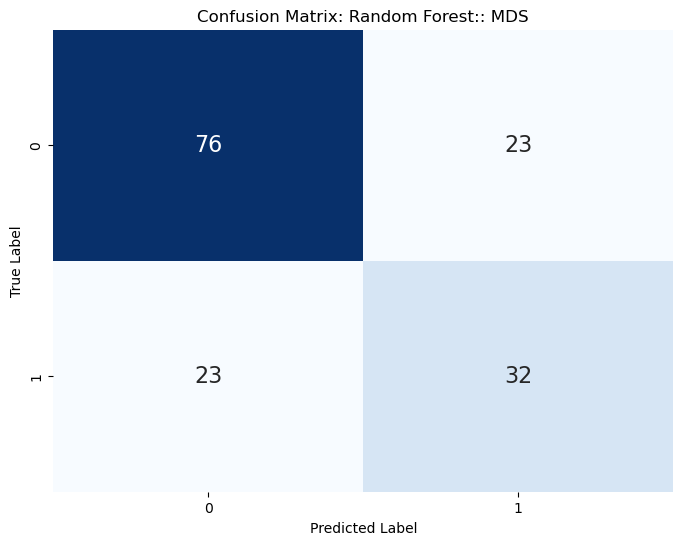

In [196]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix: Random Forest:: MDS')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### ROC Curve

In [197]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

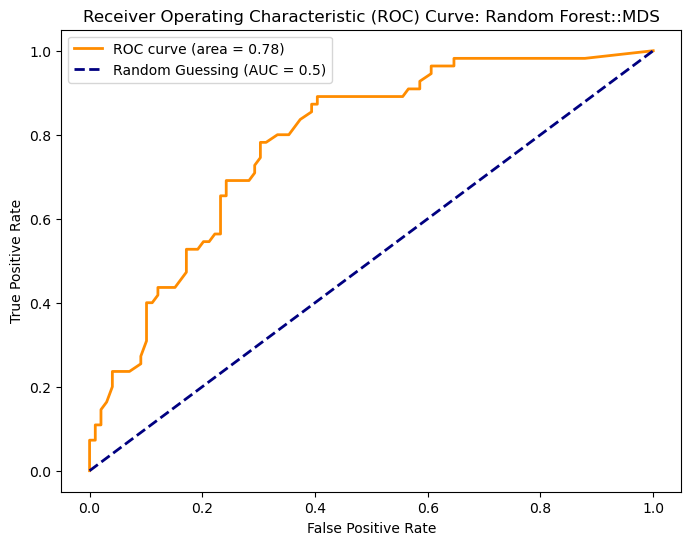

In [198]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Random Forest::MDS')
plt.legend()
plt.savefig('fig_16_a_rf_mds_roc_output.png')
plt.show()

In [199]:
def rf_learn_curve_mds(X, y, n_estimators, n_components=None):
    '''
    param X: Matrix of input features
    param y: Vector of Target/Label
    n_estimators: The number of trees in the forest
    n_components: Number of components for MDS. If None, MDS will not be applied.
    '''
    
    le = LabelEncoder()  # Label encoding the target
    sc = StandardScaler()  # Scaling the input features
    y = le.fit_transform(y)  # Label Encoding the target
    
    if n_components is not None:
        mds = MDS(n_components=n_components)
        X = mds.fit_transform(X)
    
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=11)  # Random Forest model
    
    # Pipeline with scaling and classification as steps, must use a pipeline since we are using KFoldCV
    rf_pipeline = Pipeline(steps=[('scaler', sc), ('classifier', rf)])
    
    cv = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)  # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(rf_pipeline, X, y, scoring="accuracy", cv=cv)  # Storing the CV scores (accuracy) of each fold
    
    rf_pipeline.fit(X, y)  # Fitting the model

    train_score = rf_pipeline.score(X, y)  # Scoring the model on the train set
    
    # Building the learning curve
    train_size, train_scores, test_scores = learning_curve(estimator=rf_pipeline, X=X, y=y, cv=cv, scoring="accuracy", random_state=11)
    train_scores = 1 - np.mean(train_scores, axis=1)  # converting the accuracy score to misclassification rate
    test_scores = 1 - np.mean(test_scores, axis=1)  # converting the accuracy score to misclassification rate
    
    lc = pd.DataFrame({"Training_size": train_size, "Training_loss": train_scores, "Validation_loss": test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores": cv_scores, "train_score": train_score, "learning_curve": lc}

### The Learning curve of a Random Forest with MDS used

Cross Validation Accuracies:
-------------------------
[0.7662337662337663, 0.8246753246753247, 0.7792207792207793, 0.8235294117647058, 0.803921568627451]

Mean Cross Validation Accuracy:
-------------------------
0.7995161701044052

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.02344631172885731

Training Accuracy:
---------------
0.8385416666666666




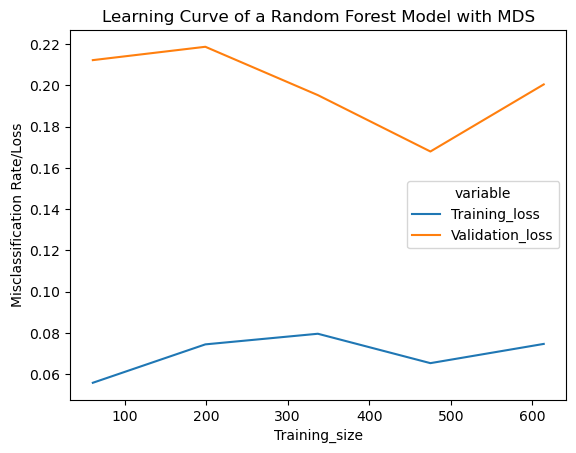

In [200]:
lc_rf = rf_learn_curve_mds(X,y,1)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc_rf["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc_rf["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc_rf["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc_rf["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Random Forest Model with MDS")
plt.ylabel("Misclassification Rate/Loss");
plt.savefig('fig_16_b_rf_mds_learning_curve_output.png')

## Building a Random Forest Model with no dimensionality reduction techniques

### Standardizing the features

In [201]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Split the data into training and testing sets

In [202]:
# Splitting into train and test sets
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

### Building and training the Random Forest model

In [203]:
# Build the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predict the model on the test set

In [204]:
# Predict the model on the test set
y_pred = rf_model.predict_proba(X_test)[:, 1]
y_pred_classes = (y_pred > 0.5).astype(int)

### Evaluate the model

In [205]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred)

### Displaying the results

In [206]:
# Print the results
print(f'Accuracy: {accuracy:.2f}') 
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.88
Runtime: 281.86 ms
Confusion Matrix:
[[88 11]
 [ 7 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        99
           1       0.81      0.87      0.84        55

    accuracy                           0.88       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.89      0.88      0.88       154


Log Loss: 0.31392264820464655


### Plot the confusion matrix

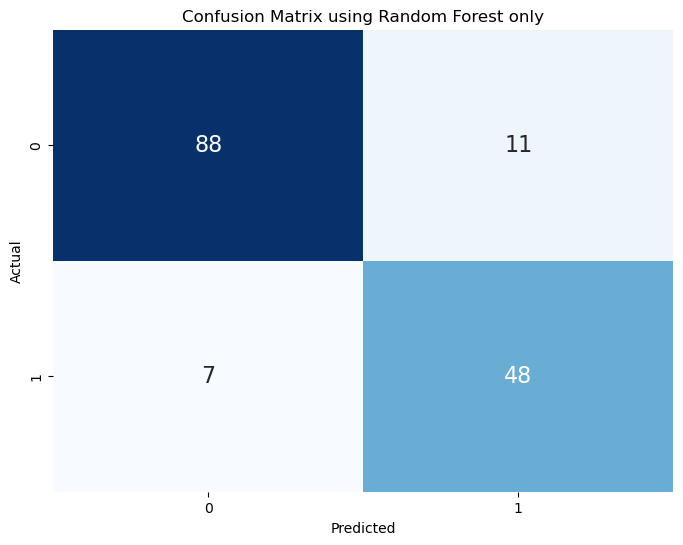

In [207]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix using Random Forest only")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC Curve

In [208]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

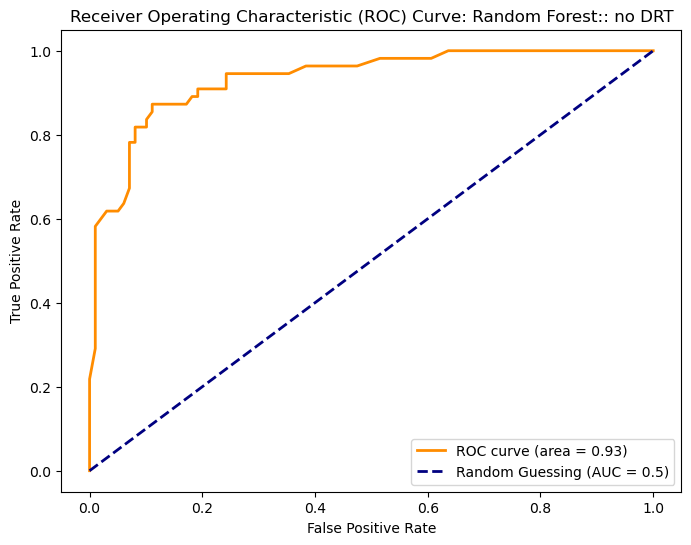

In [209]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Random Forest:: no DRT')
plt.legend()
plt.savefig('fig_17_a_rf_no_drt_roc_output.png')
plt.show()

### The Learning curve of a Random Forest with no dimensionality reduction technique used

Cross Validation Accuracies:
-------------------------
[0.8246753246753247, 0.7532467532467533, 0.7857142857142857, 0.8888888888888888, 0.8366013071895425]

Mean Cross Validation Accuracy:
-------------------------
0.8178253119429589

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.04615409166914938

Training Accuracy:
---------------
0.8580729166666666




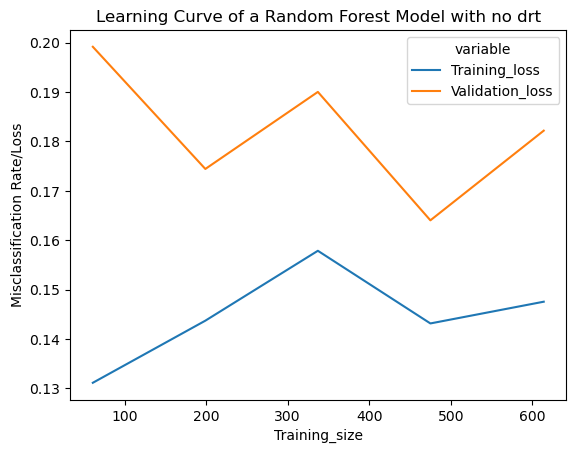

In [210]:
lc = random_forest_learn_curve(X,y,1,max_depth=3)
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of a Random Forest Model with no drt")
plt.ylabel("Misclassification Rate/Loss");
plt.savefig('fig_17_b_rf_no_drt_learning_curve_output.png')

## Building an Artificial Neural Network (ANN) Model after applying PCA

### Standardize the features

In [211]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

### Apply PCA for dimensionality reduction

In [212]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3) # We set n_componenets = 3 because when we have only 3 components when variance is 1
X_pca = pca.fit_transform(X_standardized)

### Split the data into training and testing sets

In [213]:
# Split the data into training and testing sets
start_time = time.time()
X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.4, random_state=42)

### Split the data into training and validation sets

In [214]:
# Split the data into training and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Now you can use X_train, y_train for actual training, and X_val, y_val for validation

### Build the Deep Artificial Neural Network (ANN) model with early stopping

In [215]:
# Build the Deep Artificial Neural Network (ANN) model with early stopping
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [216]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Set up early stopping to prevent overfitting

In [217]:
# Set up early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### Train the model with early stopping

In [218]:
# Train the model with early stopping
#history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/50
15/15 [==============================] - 3s 20ms/step - loss: 0.6852 - accuracy: 0.6000 - val_loss: 0.6216 - val_accuracy: 0.6883
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6266 - accuracy: 0.6630 - val_loss: 0.5792 - val_accuracy: 0.7597
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.5833 - accuracy: 0.7217 - val_loss: 0.5431 - val_accuracy: 0.7727
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.5497 - accuracy: 0.7565 - val_loss: 0.5137 - val_accuracy: 0.7922
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5345 - accuracy: 0.7196 - val_loss: 0.4889 - val_accuracy: 0.7857
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.5235 - accuracy: 0.7457 - val_loss: 0.4730 - val_accuracy: 0.7857
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.5103 - accuracy: 0.7435 - val_loss: 0.4625 - val_accuracy: 0.7857
Epoch 8/50
15/15 [=

### Make predictions

In [219]:
# Make predictions
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

5/5 [==============================] - 0s 2ms/step


### Evaluate the model

In [220]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_prob)

### Display the results

In [221]:
# Print the results
print(f'Accuracy: {accuracy:.2f}') 
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.81
Runtime: 10133.66 ms
Confusion Matrix:
[[88 14]
 [15 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       102
           1       0.73      0.71      0.72        52

    accuracy                           0.81       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154


Log Loss: 0.4110756313265204


### Plot the log loss curve

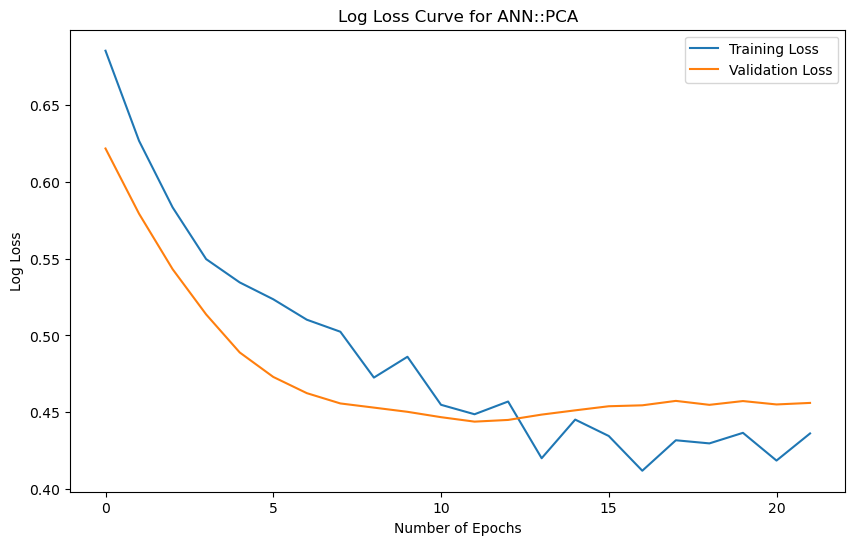

In [222]:
# Plot the log loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Log Loss Curve for ANN::PCA')
plt.xlabel('Number of Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.savefig('fig_18_a_ann_pca_log_loss_output.png')
plt.show()

### ROC Curve

In [223]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

### Plot ROC curve

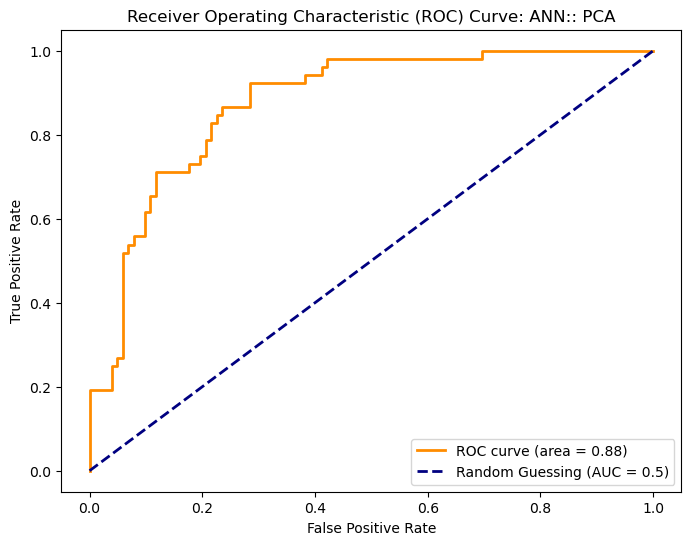

In [224]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: ANN:: PCA')
plt.legend()
plt.savefig('fig_18_b_ann_pca_roc_output.png')
plt.show()

## Building an Artificial Neural Network (ANN) Model after applying t-SNE

### Standardize the features

In [225]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

### Apply t-SNE for dimensionality reduction

In [226]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_standardized)

### Split the data into training and testing sets

In [227]:
# Split the data into training, validation, and testing sets
start_time = time.time()
X_train, X_temp, y_train, y_temp = train_test_split(X_tsne, y, test_size=0.4, random_state=42)

### Split the data into training and validation sets

In [228]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Build the Deep Artificial Neural Network (ANN) model with early stopping

In [229]:
# Build the Deep Artificial Neural Network (ANN) model with early stopping
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [230]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Set up early stopping to prevent overfitting

In [231]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### Train the model with early stopping

In [232]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 1.9032 - accuracy: 0.5478 - val_loss: 0.8765 - val_accuracy: 0.7273
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 1.6284 - accuracy: 0.6174 - val_loss: 0.7271 - val_accuracy: 0.7468
Epoch 3/100
15/15 [==============================] - 0s 10ms/step - loss: 1.3060 - accuracy: 0.6587 - val_loss: 0.6728 - val_accuracy: 0.7403
Epoch 4/100
15/15 [==============================] - 0s 10ms/step - loss: 1.3335 - accuracy: 0.6543 - val_loss: 0.6593 - val_accuracy: 0.7338
Epoch 5/100
15/15 [==============================] - 0s 10ms/step - loss: 1.3534 - accuracy: 0.6261 - val_loss: 0.6481 - val_accuracy: 0.7338
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 1.0626 - accuracy: 0.6826 - val_loss: 0.6419 - val_accuracy: 0.7338
Epoch 7/100
15/15 [==============================] - 0s 9ms/step - loss: 0.9894 - accuracy: 0.6826 - val_loss: 0.6265 - val_accuracy: 0.7273
Epoch 8/1

### Make predictions

In [233]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

5/5 [==============================] - 0s 5ms/step


### Evaluate the model

In [234]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred)

### Display the results

In [235]:
# Print the results
print(f'Accuracy: {accuracy:.2f}') 
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.75
Runtime: 4429.80 ms
Confusion Matrix:
[[89 13]
 [25 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       102
           1       0.68      0.52      0.59        52

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154


Log Loss: 0.4990342316956229


### Plot the log loss curve

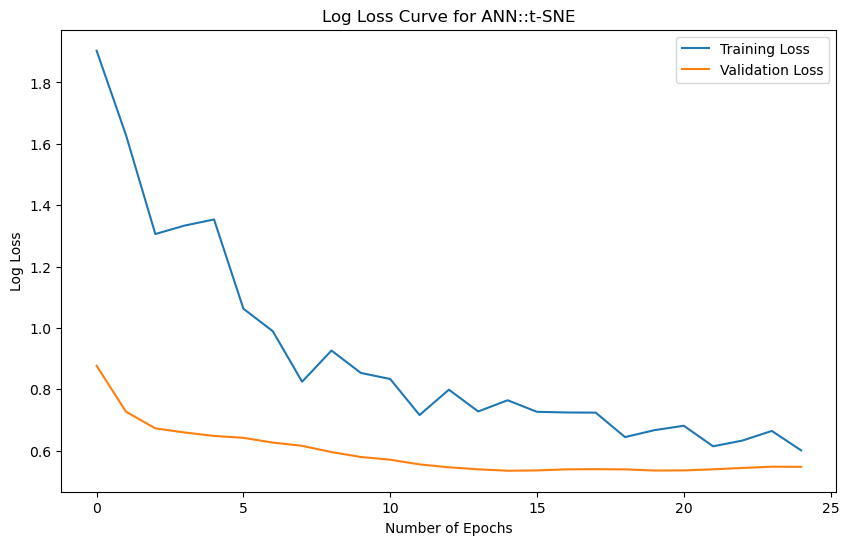

In [236]:
# Plot the log loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Log Loss Curve for ANN::t-SNE')
plt.xlabel('Number of Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.savefig('fig_19_a_ann_tsne_log_loss_output.png')
plt.show()

### ROC Curve

In [237]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

### Plot ROC curve

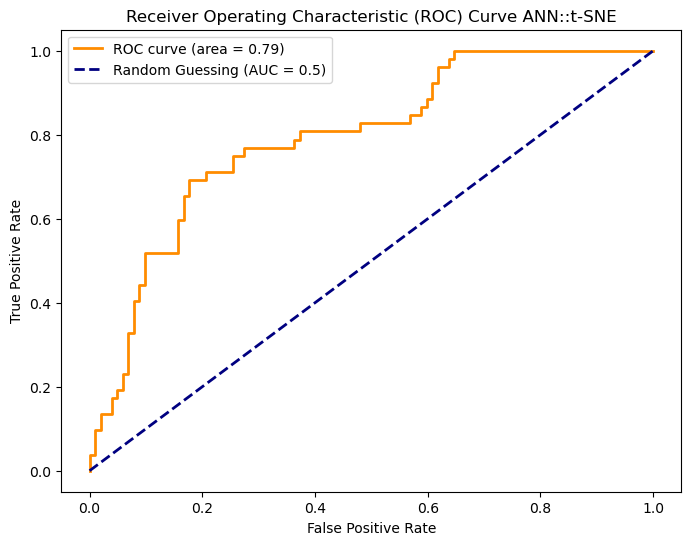

In [238]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ANN::t-SNE')
plt.legend()
plt.savefig('fig_19_b_ann_tsne_roc_output.png')
plt.show()

## Building an Artificial Neural Network (ANN) Model after applying MDS

### Standardize the features

In [239]:
# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

### Apply MDS for dimensionality reduction

In [240]:
# Apply MDS for dimensionality reduction
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_standardized)

### Split the data into training and testing sets

In [241]:
# Split the data into training and testing sets
start_time = time.time()
X_train, X_temp, y_train, y_temp = train_test_split(X_mds, y, test_size=0.4, random_state=42)
# Split the data into training, validation, and testing sets

### Split the data into training and validation sets

In [242]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Build the Deep Artificial Neural Network (ANN) model with early stopping

In [243]:
# Build the Deep Artificial Neural Network (ANN) model with early stopping
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [244]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Set up early stopping to prevent overfitting

In [245]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### Train the model with early stopping

In [246]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 0.6761 - accuracy: 0.5717 - val_loss: 0.5735 - val_accuracy: 0.7143
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.6415 - accuracy: 0.6217 - val_loss: 0.5270 - val_accuracy: 0.7532
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5690 - accuracy: 0.7304 - val_loss: 0.5073 - val_accuracy: 0.7532
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5431 - accuracy: 0.7239 - val_loss: 0.4984 - val_accuracy: 0.7597
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5248 - accuracy: 0.7348 - val_loss: 0.4880 - val_accuracy: 0.7597
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5420 - accuracy: 0.7196 - val_loss: 0.4852 - val_accuracy: 0.7597
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5183 - accuracy: 0.7478 - val_loss: 0.4825 - val_accuracy: 0.7597
Epoch 8/100


### Make predictions

In [247]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

5/5 [==============================] - 0s 5ms/step


### Evaluate the model

In [248]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred)

### Display the results

In [249]:
# Print the results
print(f'Accuracy: {accuracy:.2f}') 
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.77
Runtime: 4882.04 ms
Confusion Matrix:
[[85 17]
 [19 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       102
           1       0.66      0.63      0.65        52

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.77       154


Log Loss: 0.4606910089588026


### Plot the log loss curve

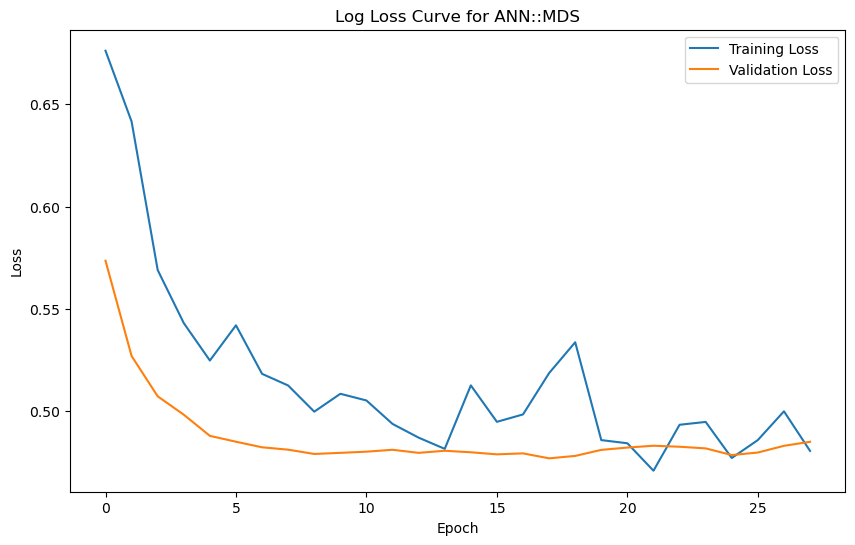

In [250]:
# Plot the log loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.title('Log Loss Curve for ANN::MDS')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('fig_20_a_ann_mds_log_loss_output.png')
plt.show()

### ROC Curve

In [251]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

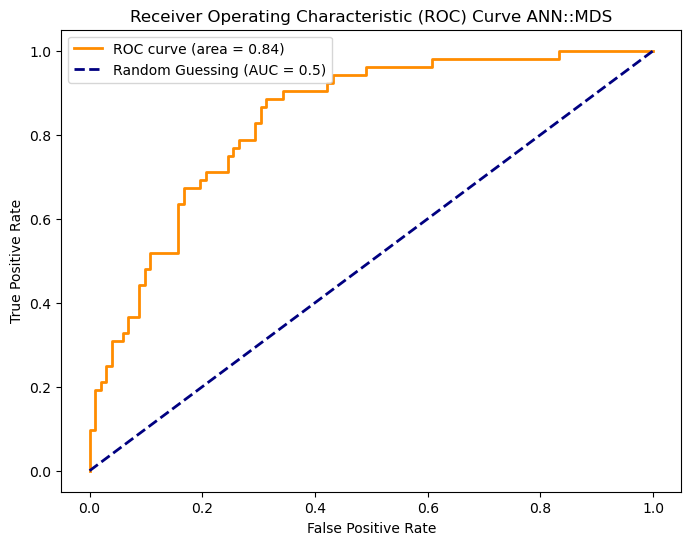

In [252]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ANN::MDS')
plt.legend()
plt.savefig('fig_20_b_ann_mds_roc_output.png')
plt.show()

## Building an Artificial Neural Network (ANN) Model with no dimensionality reduction techniques

### Standardize the data

In [253]:
# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Split the data into training and test sets

In [254]:
# Split the data into training, validation, and testing sets
start_time = time.time()
X_train, X_temp, y_train, y_temp = train_test_split(X_std, y, test_size=0.4, random_state=42)

### Split the training data into training and validation sets

In [255]:
# Split the training data into training and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Build the Artificial Neural Network (ANN) model

In [256]:
# Build the Artificial Neural Network (ANN) model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [257]:
# Compile the model
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Set up early stopping to prevent overfitting

In [258]:
# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=20, restore_best_weights=True)

### Train the model

In [259]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/100
15/15 [==============================] - 1s 18ms/step - loss: 0.6763 - accuracy: 0.5783 - val_loss: 0.5875 - val_accuracy: 0.7143
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5822 - accuracy: 0.6848 - val_loss: 0.5420 - val_accuracy: 0.7468
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.5407 - accuracy: 0.7022 - val_loss: 0.5086 - val_accuracy: 0.7727
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5259 - accuracy: 0.7348 - val_loss: 0.4899 - val_accuracy: 0.7727
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5246 - accuracy: 0.7522 - val_loss: 0.4841 - val_accuracy: 0.7662
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.4878 - accuracy: 0.7543 - val_loss: 0.4758 - val_accuracy: 0.7662
Epoch 7/100
15/15 [==============================] - 0s 10ms/step - loss: 0.4707 - accuracy: 0.7565 - val_loss: 0.4735 - val_accuracy: 0.7662
Epoch 8/100

Epoch 59/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3512 - accuracy: 0.8609 - val_loss: 0.4602 - val_accuracy: 0.8117
Epoch 60/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3659 - accuracy: 0.8500 - val_loss: 0.4615 - val_accuracy: 0.8052
Epoch 61/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3491 - accuracy: 0.8565 - val_loss: 0.4579 - val_accuracy: 0.8052
Epoch 62/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3374 - accuracy: 0.8565 - val_loss: 0.4589 - val_accuracy: 0.8052
Epoch 63/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3258 - accuracy: 0.8739 - val_loss: 0.4567 - val_accuracy: 0.8052
Epoch 64/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3505 - accuracy: 0.8543 - val_loss: 0.4559 - val_accuracy: 0.8052
Epoch 65/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3173 - accuracy: 0.8478 - val_loss: 0.4582 - val_accuracy: 0.7987
Epoch 

### Predict the model

In [260]:
# Predict the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

5/5 [==============================] - 0s 5ms/step


### Evaluate the model on the test set

In [261]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
end_time = time.time()
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
runtime_ms = (end_time - start_time) * 1000  # Convert to milliseconds
loss = log_loss(y_test, y_pred)

### Display the results

In [262]:
# Print the results
print(f'Accuracy: {accuracy:.2f}') 
print(f'Runtime: {runtime_ms:.2f} ms')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
# Calculate and display log loss
print(f"\nLog Loss: {loss}")

Accuracy: 0.90
Runtime: 12933.54 ms
Confusion Matrix:
[[94  8]
 [ 7 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       102
           1       0.85      0.87      0.86        52

    accuracy                           0.90       154
   macro avg       0.89      0.89      0.89       154
weighted avg       0.90      0.90      0.90       154


Log Loss: 0.3810011029805206


### Plot the training history

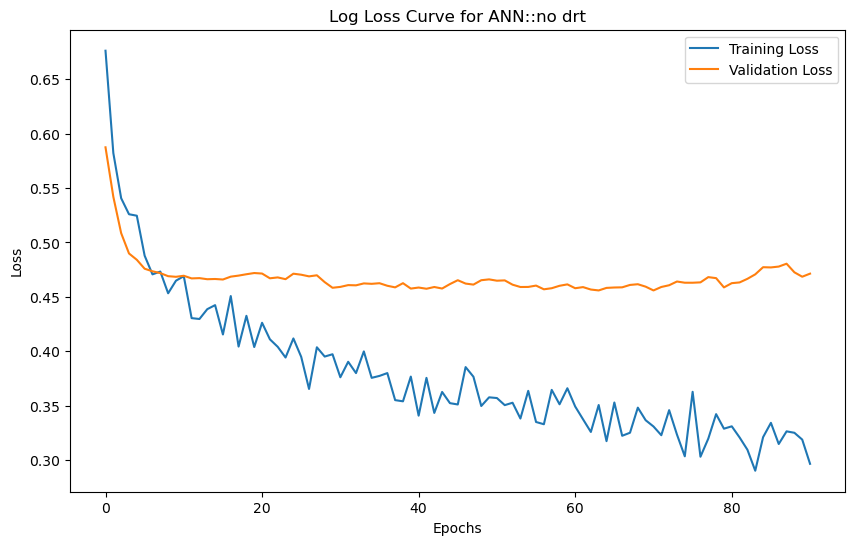

In [263]:
# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Log Loss Curve for ANN::no drt')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('fig_21_a_ann_no_drt_log_loss_output.png')
plt.show()

### ROC Curve

In [264]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

### Plot the ROC Curve

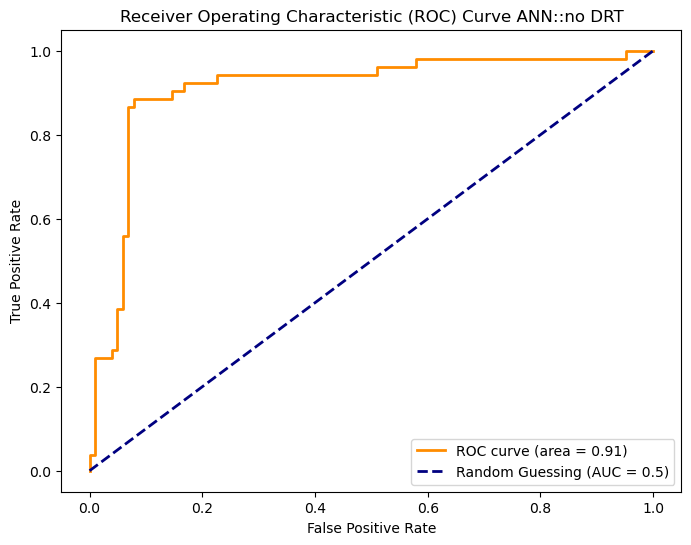

In [265]:
# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ANN::no DRT')
plt.legend()
plt.savefig('fig_21_b_ann_no_drt_roc_output.png')
plt.show()